# Importing Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
from google.colab import drive, files
drive.mount('/content/drive')
import nltk.corpus
from nltk.tokenize import word_tokenize #tokenization
nltk.download('punkt')
import nltk #to handle natural language processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder #convert class labels to binary
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression #import LinearRegression from sklearn for question on Linear Regression models
from sklearn.model_selection import train_test_split #import train_test_split from sklearn to split the data to training and test data
from nltk.util import bigrams, trigrams,ngrams
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from pandas import DataFrame
from nltk.stem import PorterStemmer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score #imported to measure the auc score
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import re
from nltk import ne_chunk

Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Discovering and Preparing Needed Data 

##Data Discovery: Loading Datasets

In [ ]:
#main_dataframe
# patientdata = pd.read_csv("latestdata.csv")
patientdata = pd.read_csv("/content/drive/My Drive/DSC 500 Datasets/latestdata.csv")
# files.download("latestdata.csv")
patientdata.head()
patientdata.shape
# patientdata["chronic_disease"].unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2676311, 33)

## Data Conditioning: Cleaning Dataset for exploration

In [ ]:
#lowercase all str
patientdata = patientdata.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
patientdata.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,nan,male,shek lei,hong kong,china,22.365019,114.133808,point,nan,nan,14.02.2020,nan,nan,22.01.2020,china,nan,case 55; mainland china travel via the lok ma ...,False,nan,https://www.scmp.com/news/hong-kong/health-env...,nan,"critical condition, intubated as of 14.02.2020",nan,nan,shek lei,nan,nan,hong kong,china,8029.0,nan,nan
1,000-1-10,78,male,vo euganeo,veneto,italy,45.297748,11.658382,point,nan,nan,21.02.2020,nan,nan,nan,nan,nan,hospitalized on 12.02.2020 for other reasons,False,nan,https://www.corriere.it/cronache/20_febbraio_2...,nan,death,22.02.2020,nan,vo' euganeo,nan,nan,veneto,italy,8954.0,nan,nan
2,000-1-100,61,female,nan,nan,singapore,1.353460,103.815100,admin0,nan,nan,14.02.2020,nan,nan,nan,nan,nan,"case 65; family member of case 50, a dbs emplo...",False,nan,https://www.channelnewsasia.com/news/singapore...,nan,discharge,17.02.2020,nan,nan,nan,nan,nan,singapore,200.0,nan,nan
3,000-1-1000,nan,nan,zhengzhou city,henan,china,34.629310,113.468000,admin2,nan,nan,26.01.2020,nan,nan,nan,nan,nan,nan,False,nan,https://news.163.com/special/epidemic/?spssid=...,nan,nan,nan,nan,nan,nan,zhengzhou city,henan,china,10091.0,nan,nan
4,000-1-10000,nan,nan,pingxiang city,jiangxi,china,27.513560,113.902900,admin2,nan,nan,14.02.2020,nan,nan,nan,nan,nan,nan,False,nan,http://hc.jiangxi.gov.cn/doc/2020/02/15/138898...,nan,nan,nan,nan,nan,nan,pingxiang city,jiangxi,china,7060.0,nan,nan


In [ ]:
#reverse the nan to np.nan
patientdata.replace({"nan":np.nan}, inplace=True)

In [ ]:
#checking for duplicates
old_length = len(patientdata)
patientdata = patientdata.drop_duplicates(keep = 'first', inplace = False)
print("There are", len(patientdata) - old_length, "duplicate rows in this dataset.")

There are 0 duplicate rows in this dataset.


In [ ]:
#drop unneeded columns:
patientdata = patientdata.drop(columns=['latitude','longitude','geo_resolution',
                                        'source','sequence_available','admin3','admin2',
                                        'admin1','admin_id','data_moderator_initials'])

In [ ]:
#check percent of missing values per column
print("Percentage of missing values per column")
for i in patientdata.columns:
  print(i, ":",round((patientdata[i].isna().sum()/len(patientdata))*100,2),"%") 

Percentage of missing values per column
ID : 0.0 %
age : 78.4 %
sex : 78.32 %
city : 36.53 %
province : 16.91 %
country : 0.0 %
date_onset_symptoms : 90.23 %
date_admission_hospital : 95.66 %
date_confirmation : 4.05 %
symptoms : 99.92 %
lives_in_Wuhan : 99.84 %
travel_history_dates : 99.9 %
travel_history_location : 99.66 %
reported_market_exposure : 99.96 %
additional_information : 98.29 %
chronic_disease_binary : 0.0 %
chronic_disease : 99.99 %
outcome : 88.51 %
date_death_or_discharge : 99.88 %
notes_for_discussion : 99.98 %
location : 99.5 %
country_new : 1.14 %
travel_history_binary : 2.45 %


## Survey and Visualise: Representation in Patients Dataset

In [ ]:
print("The dataset has", patientdata.shape[0], 
      "rows of data on individuals COVID patients with ID numbers ranging from",
      patientdata["ID"].unique()[0], "to", patientdata["ID"].unique()[-1],"\nThe number of countries represented are" ,len(patientdata["country"].unique()))

The dataset has 2676311 rows of data on individuals COVID patients with ID numbers ranging from 000-1-1 to 010-99999 
The number of countries represented are 147


### Age

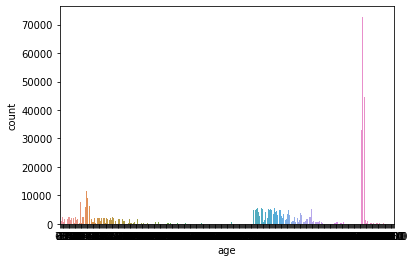

In [ ]:
#still do representation of the non-conventional dataset
ax = sns.countplot(x="age",data=patientdata) #not looking very nice

In [ ]:
#coerce the age column:
patientdata_age = patientdata.copy()
patientdata_age["age"] = pd.to_numeric(patientdata["age"], errors='coerce')

#removing missing values
patientdata_age.drop(patientdata_age.loc[patientdata_age['age'].isna()].index, inplace=True)
patientdata_age["age"] = patientdata_age["age"].astype(int)
patientdata_age["age"].unique()
#bin ages
patientdata_age['age_bins'] = pd.cut(x=patientdata_age['age'], 
                                                  bins=[0,9,19,29, 39, 49,59,69,79,89,99])
patientdata_age["age_bins"].unique()

#missing data
print(round((patientdata_age["age"].isna().sum()/len(patientdata_age))*100,2),"%",
      "of the patient data on age was missing after the data was cleaned. Therefore,", 
      round(((100-round((patientdata_age["age"].isna().sum()/len(patientdata_age))*100,2))/100)*len(patientdata_age),0),
      "patient data on age was represented.")

0.0 % of the patient data on age was missing after the data was cleaned. Therefore, 338490.0 patient data on age was represented.


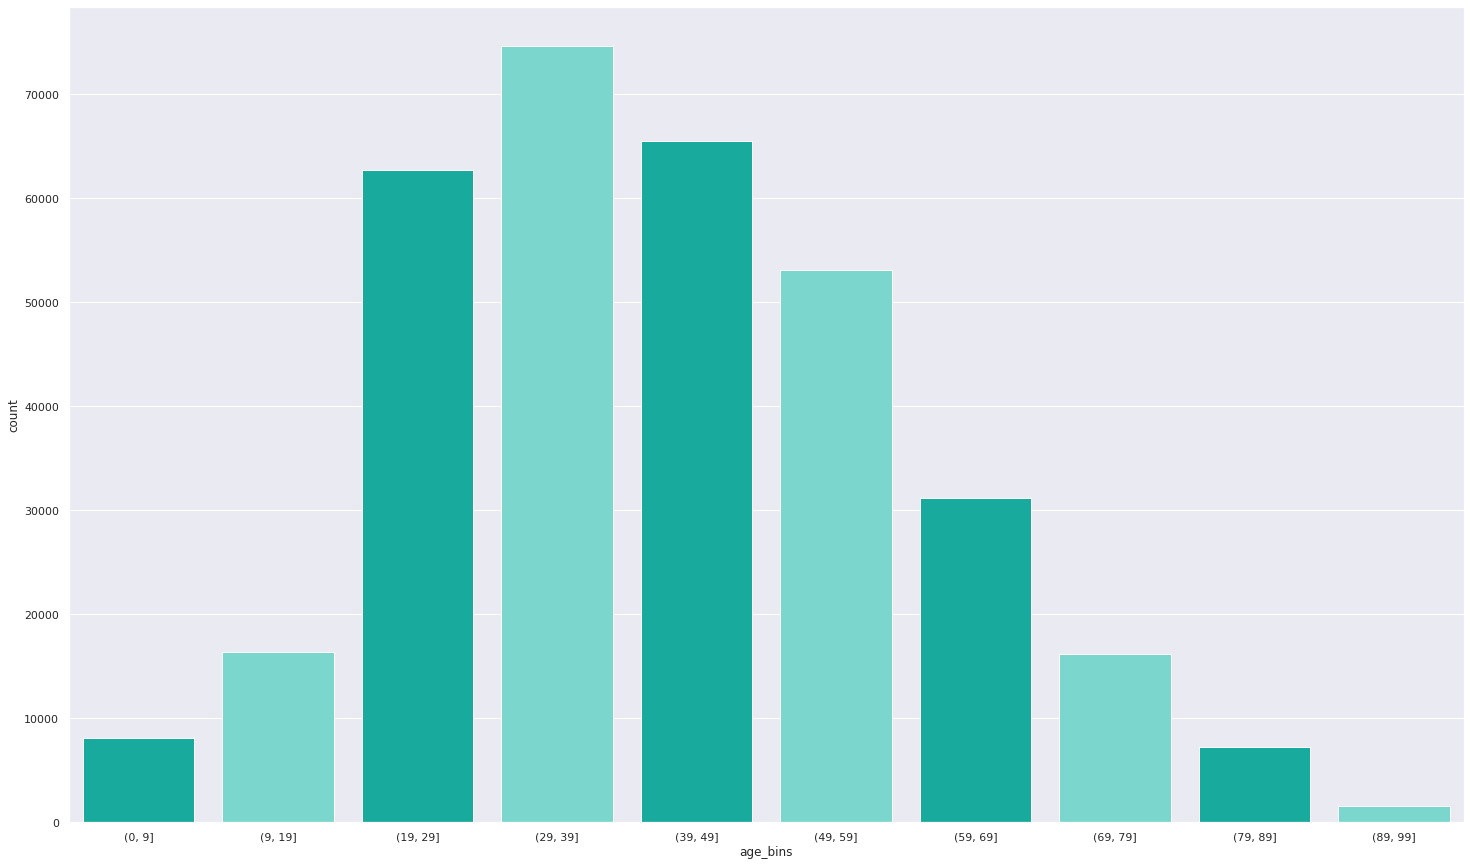

In [ ]:
#now graph again
sns.set(rc={'figure.figsize':(25,15)})
sns.set(font_scale=2.8)
sns.set(rc = {'figure.facecolor':'white'})
ax = sns.countplot(x="age_bins",data=patientdata_age,palette=["#00c3b1","#6ce6da"],
                   label = "big") 


### Sex

Data for sex of patients was missing for 78.32 % of the patients.


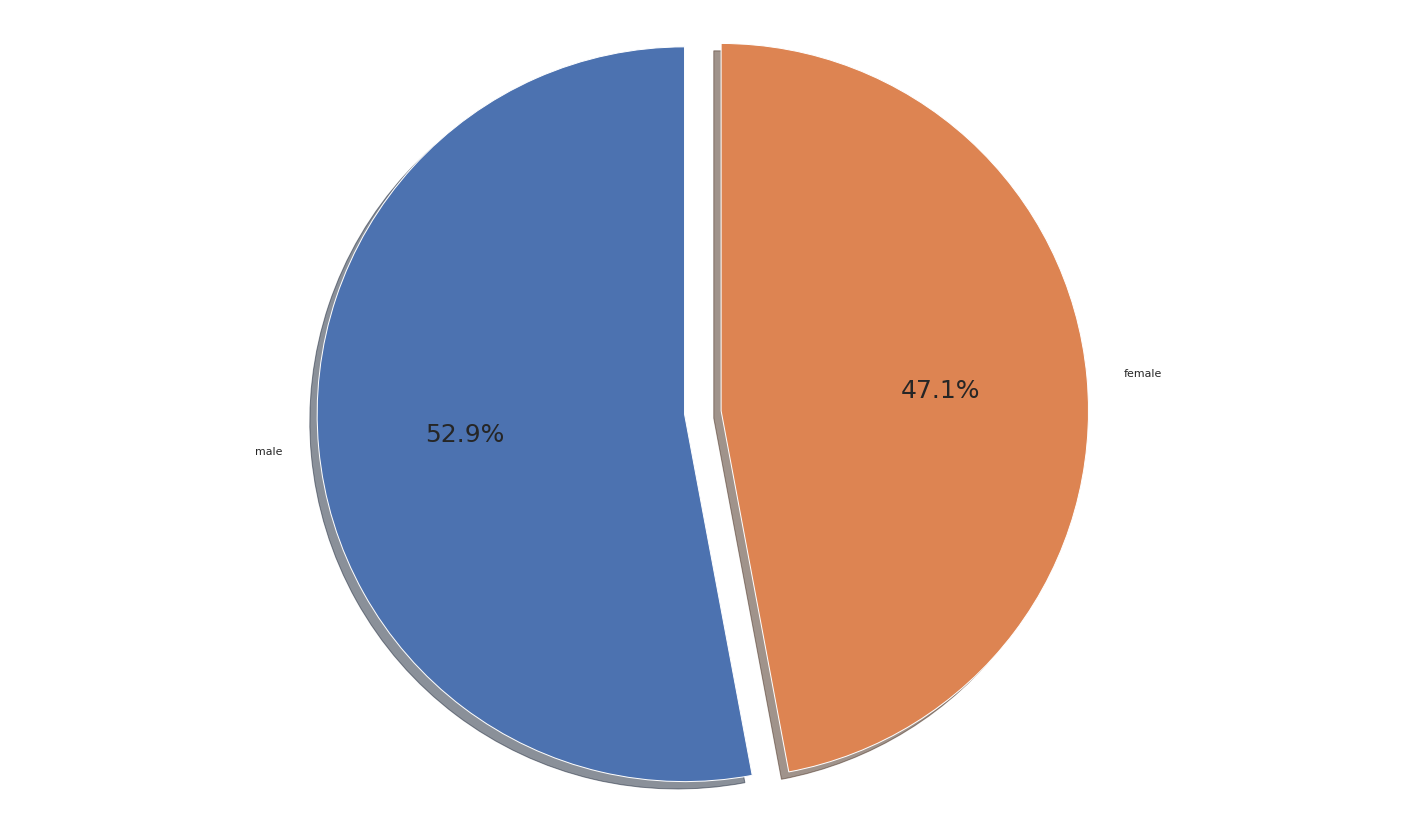

In [ ]:
#missing data 
print("Data for sex of patients was missing for",
      round((patientdata["sex"].isna().sum()/len(patientdata))*100,2),"% of the patients.") 

#current representation on sex
patientdata_sex = patientdata.copy()
patientdata_sex.dropna(subset=["sex"],inplace=True)
patientdata_sex['sex'] = patientdata_sex['sex'].astype(str)
patientdata_sex.head()
patientdata_sex["sex"].unique()

#piechart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rcParams['font.size'] = 25.0
labels = patientdata_sex["sex"].unique()
sizes = patientdata_sex["sex"].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90,
        autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#expand on what this article says for men against women for covid: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7271824/

### Country

In [ ]:
#missing data 
print("Data for country where cases were reported for each patient was missing for",
      round((patientdata["country"].isna().sum()/len(patientdata))*100,2),"% of the patients.") 
print("The top 5 most represented countries are below and account for",
      round(sum(patientdata["country"].value_counts()[0:5])/len(patientdata)*100),
      "% of the dataset.")
patientdata["country"].value_counts()[0:5]

Data for country where cases were reported for each patient was missing for 0.0 % of the patients.
The top 5 most represented countries are below and account for 52 % of the dataset.


india             301207
russia            299568
united kingdom    299469
spain             255108
italy             231006
Name: country, dtype: int64

### Dates: Symptoms Onset, Hospital Admission, and Discharge or Death

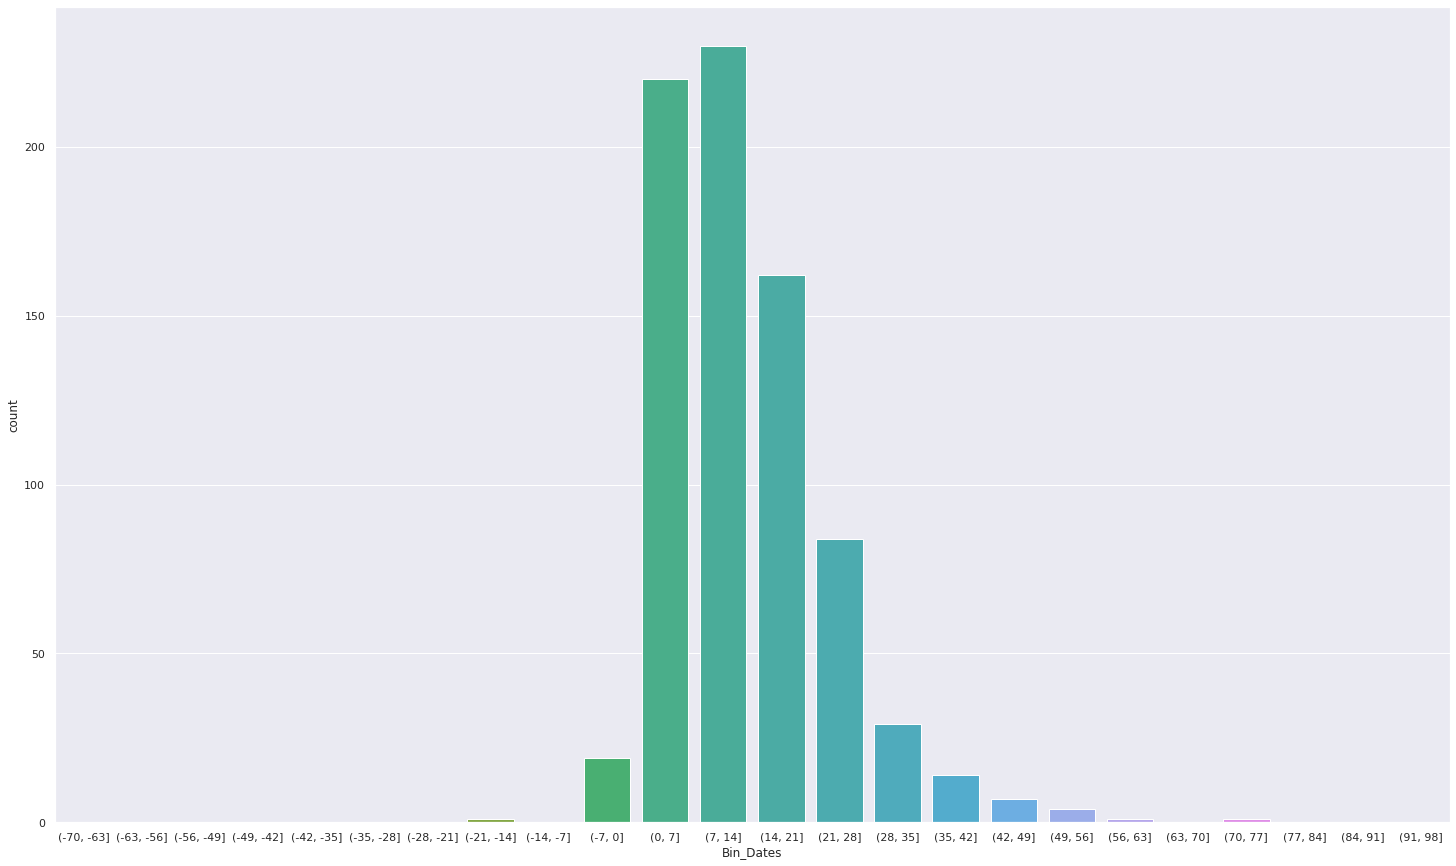

In [ ]:
patientdata_dates = patientdata.copy()
patientdata_dates = patientdata_dates[["date_onset_symptoms","date_death_or_discharge","additional_information"]]
patientdata_dates.dropna(inplace=True) #drop null rows
# patientdata_dates = patientdata_dates.drop(62693) #this row had a range for the date of onset of symptoms
#change "." to "\"
patientdata_dates["date_onset_symptoms"] = patientdata_dates["date_onset_symptoms"].str.replace('.', '/')
patientdata_dates["date_death_or_discharge"] = patientdata_dates["date_death_or_discharge"].str.replace('.', '/')
#convert to datetime
patientdata_dates['date_onset_symptoms'] =  pd.to_datetime(
    patientdata_dates['date_onset_symptoms'], format='%d/%m/%Y')
patientdata_dates['date_death_or_discharge'] =  pd.to_datetime(
    patientdata_dates['date_death_or_discharge'], format='%d/%m/%Y')
#difference between dates
patientdata_dates["Difference between dates"] = patientdata_dates["date_death_or_discharge"] - patientdata_dates["date_onset_symptoms"]
#convert days to integers
patientdata_dates['Difference between dates'] = patientdata_dates['Difference between dates'].dt.days.astype('int16')
# bin dates
patientdata_dates['Bin_Dates'] = pd.cut(x=patientdata_dates['Difference between dates'], 
                                                  bins=list(range(-70,100,7)))
#sns countplot
# print(patientdata_dates)
ax = sns.countplot(x="Bin_Dates",data=patientdata_dates)
# patientdata_dates["additional_information"].unique()


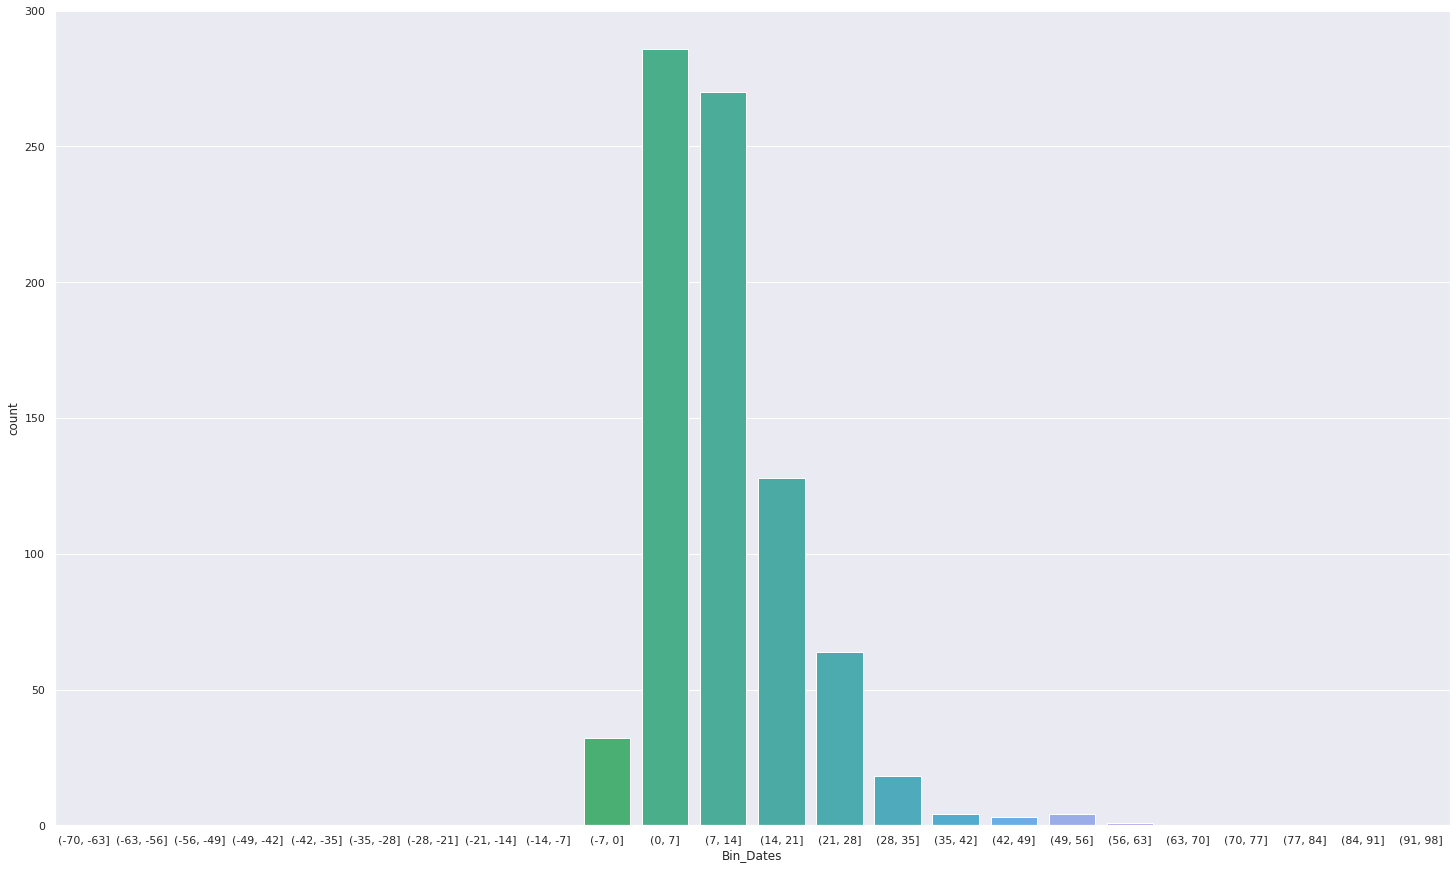

In [ ]:
patientdata_dates = patientdata.copy()
patientdata_dates = patientdata_dates[["date_admission_hospital","date_death_or_discharge"]]
patientdata_dates.dropna(inplace=True) #drop null rows
#change "." to "\"
patientdata_dates["date_admission_hospital"] = patientdata_dates["date_admission_hospital"].str.replace('.', '/')
patientdata_dates["date_death_or_discharge"] = patientdata_dates["date_death_or_discharge"].str.replace('.', '/')
#convert to datetime
patientdata_dates['date_admission_hospital'] =  pd.to_datetime(
    patientdata_dates['date_admission_hospital'], format='%d/%m/%Y')
patientdata_dates['date_death_or_discharge'] =  pd.to_datetime(
    patientdata_dates['date_death_or_discharge'], format='%d/%m/%Y')
#difference between dates
patientdata_dates["Difference between dates"] = patientdata_dates["date_death_or_discharge"] - patientdata_dates["date_admission_hospital"]
#convert days to integers
patientdata_dates['Difference between dates'] = patientdata_dates['Difference between dates'].dt.days.astype('int16')
# bin dates
patientdata_dates['Bin_Dates'] = pd.cut(x=patientdata_dates['Difference between dates'], 
                                                  bins=list(range(-70,100,7)))
#sns countplot
ax = sns.countplot(x="Bin_Dates",data=patientdata_dates)

### Chronic Disease Binary

In [ ]:
#missing data 
print("Data for chronic diseases for each patient was missing for",
      round((patientdata["chronic_disease_binary"].isna().sum()/len(patientdata))*100,2),"% of the patients.")
# sns.set(rc={'figure.figsize':(20,10)})
# ax = sns.countplot(x="chronic_disease_binary",data=patientdata)
patientdata["chronic_disease_binary"].value_counts()

#relate finidng here to what cdc says: https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/people-with-medical-conditions.html

Data for chronic diseases for each patient was missing for 0.0 % of the patients.


False    2676124
True         187
Name: chronic_disease_binary, dtype: int64

### Hospitalized Patients

In [ ]:
patientdata["outcome"].value_counts()
frame = patientdata[patientdata["outcome"]=="hospitalized"]
for i in frame.columns:
  print(i, ":",round((not frame[i].isna().sum()/len(frame))*100,2),"%")
frame["country_new"].value_counts() #All the hospitalized people are from India

ID : 100 %
age : 0 %
sex : 0 %
city : 0 %
province : 0 %
country : 100 %
date_onset_symptoms : 0 %
date_admission_hospital : 0 %
date_confirmation : 100 %
symptoms : 0 %
lives_in_Wuhan : 0 %
travel_history_dates : 0 %
travel_history_location : 0 %
reported_market_exposure : 0 %
additional_information : 0 %
chronic_disease_binary : 100 %
chronic_disease : 0 %
outcome : 100 %
date_death_or_discharge : 0 %
notes_for_discussion : 0 %
location : 0 %
country_new : 100 %
travel_history_binary : 100 %


india    202475
Name: country_new, dtype: int64

### Examining Rows For Hospitalized Patients

Percentage of missing values per column
ID : 0.0 %
age : 85.88 %
sex : 84.62 %
city : 14.52 %
province : 0.0 %
country : 0.0 %
date_onset_symptoms : 100.0 %
date_admission_hospital : 100.0 %
date_confirmation : 0.0 %
symptoms : 100.0 %
lives_in_Wuhan : 100.0 %
travel_history_dates : 99.97 %
travel_history_location : 99.78 %
reported_market_exposure : 100.0 %
additional_information : 94.15 %
chronic_disease_binary : 0.0 %
chronic_disease : 100.0 %
outcome : 0.0 %
date_death_or_discharge : 100.0 %
notes_for_discussion : 100.0 %
location : 98.11 %
country_new : 0.0 %
travel_history_binary : 0.0 %


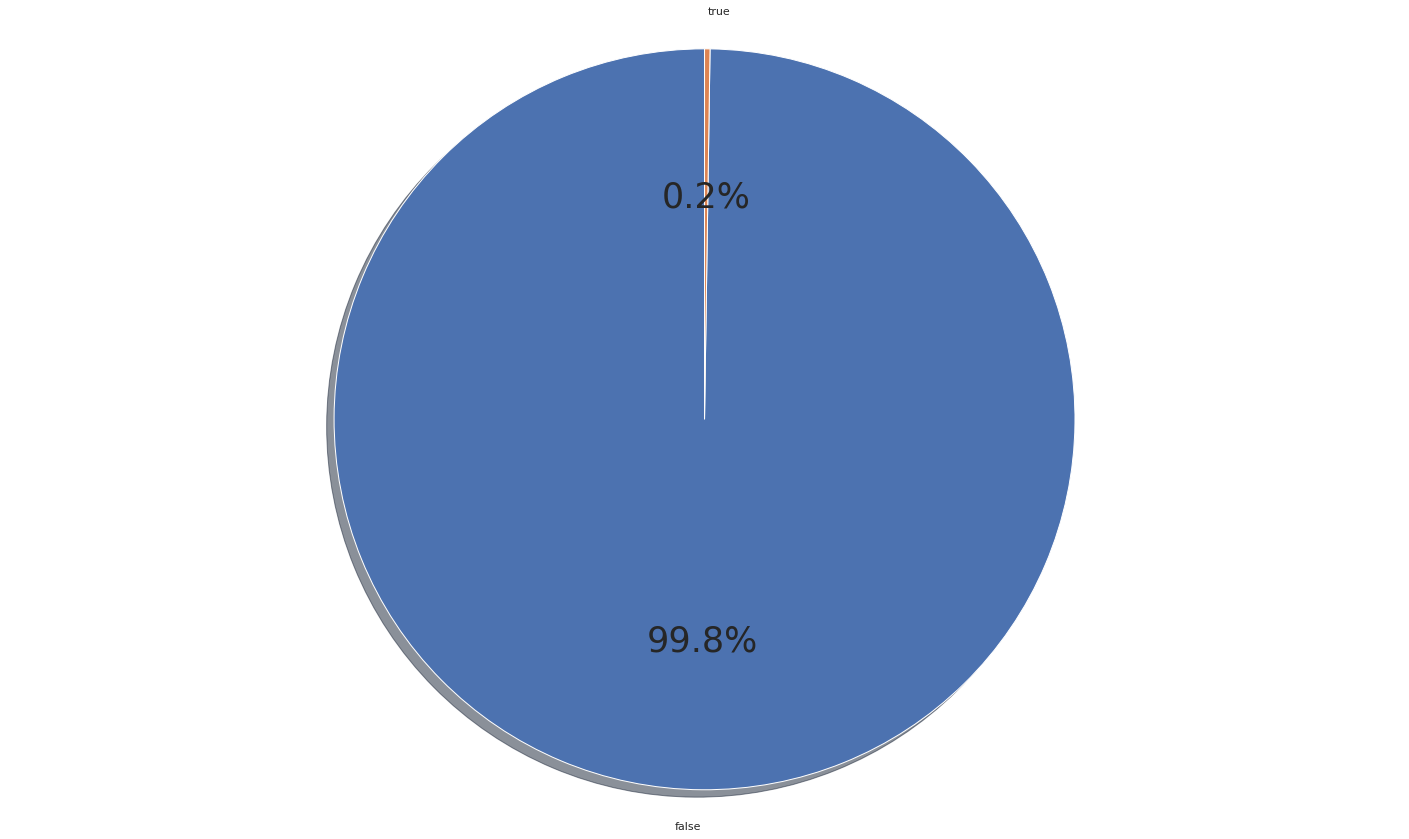

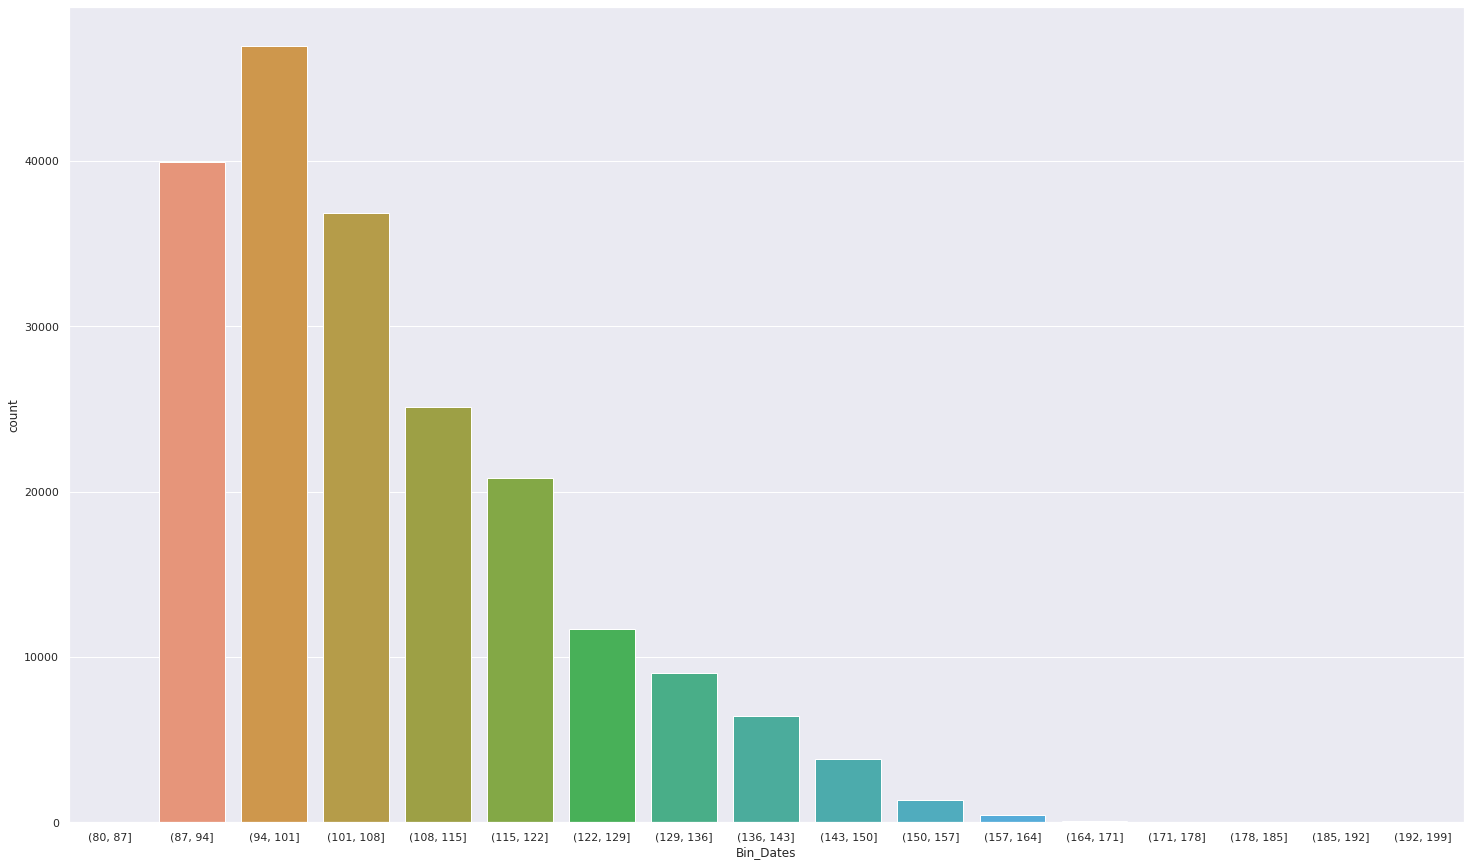

In [ ]:
patientdata3 = patientdata.copy()
patientdata3 = patientdata3[patientdata3["outcome"]=="hospitalized"]

# patientdata3["outcome"].value_counts()
# patientdata3["date_onset_symptoms"].value_counts()

#check percent of missing values per column
print("Percentage of missing values per column")
for i in patientdata3.columns:
  print(i, ":",round((patientdata3[i].isna().sum()/len(patientdata3))*100,2),"%") 

#What percentage of the patients had travelled before?
#piechart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rcParams['font.size'] = 35
labels = patientdata3["travel_history_binary"].unique()
sizes = patientdata3["travel_history_binary"].value_counts()
explode = (0, 0)  # dont explode
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90,
        autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#Question: How long have the patients been hospitalized since they were confirmed with having COVID-9?
#Note: I got this dataframe on August 30th
patientdata3['last_hospitalization_date'] = pd.date_range(start='08/30/2020', 
                                                          end = '08/30/2020',
                                                          periods=len(patientdata3))
patientdata3 = patientdata3[["last_hospitalization_date","date_confirmation"]]
patientdata3.dropna(inplace=True) #drop null rows
# patientdata3 = patientdata_dates.drop(62693) #this row had a range for the date of onset of symptoms
#change "." to "\" and convert to datetime
patientdata3["date_confirmation"] = patientdata3["date_confirmation"].str.replace('.', '/')
patientdata3["date_confirmation"] = pd.to_datetime(patientdata3["date_confirmation"], format='%d/%m/%Y')
#difference between dates
patientdata3["difference"] = patientdata3["last_hospitalization_date"] - patientdata3["date_confirmation"]
#convert days to integers
patientdata3['difference'] = patientdata3['difference'].dt.days.astype('int16')
patientdata3['difference'].unique()
# bin dates
patientdata3['Bin_Dates'] = pd.cut(x=patientdata3['difference'], 
                                                  bins=list(range(80,200,7)))
#sns countplot
ax = sns.countplot(x="Bin_Dates",data=patientdata3) #probably because there is a backlog of updated data 

# Model Planning

## Data Exploration and Variable Selection

The columns I will be considering for my model are:
1. `symptoms`
2.  `outcome`
3.  `additional information`
4.  `notes for discussion`
5.  `chronic_disease`
6.  `travel_history_location`

I selected these columns because they can help with predicting the eventual outcome of a COVID patient. 

I will be working on these columns as separate individuals for the NLTK process. I will also consider merging text data from a number of these columns. 



## Model Selection

I settled on the **Natural Language Processing (NLP) model** since NLP has proved to be successful at analyzing unstructured text data. Therefore, it will assist with meeting the goals of the project. This is the only model I will be using. 


This model will be helpful because it has been used for Electronic Health Records in Medical Informatics ([Source 1](https://www.aclweb.org/anthology/W16-2926.pdf), [Source 2](https://ajp.psychiatryonline.org/doi/full/10.1176/appi.ajp.2014.14091177)). Interestingly, medical informatics is also our market sector.



**Assumptions:**
Below is the assumption for my Natural Language Processing model:
1. Text data on each COVID patient is generated dependent  on information obtained from the COVID patient. 

Source: [_The Basic Assumptions of NLP_](https://pasterski.com/2014/02/basic-assumptions-nlp/#:~:text=NLP%20also%20assumes%20that%20the,differently%20from%20what%20was%20intended)
   
After considering a number of open source tools for NLP (i.e _Natural Language ToolKit (NLTK), SpaCy with Textacy, and PyTorch-NLP_), I settled on NLTK since it is the most popular NLTK tool that can assist with building a more rigorous model for my project. 




# Model Building

**Components of the NLP Model**

To create a robust model that has high sensitivity and specificity ratings, I will consider using the following components:


1.  <u>Tokenization </u> - Breaking sentences into words for text analysis. Here words will be seperated into boxes. However, it will be important to consider cases where some words naturally come as pairs. E.g "San Fransisco" or "New York". It will also be important to consider how hyphens, parentheses, and other punctuation marks will be tokenized

2.   <u>Stemming </u> - Normalizing words into their basic or root forms e.g "affection", "affect", and "affectionately" will be mapped to affect

3.  <u>Lemmatization </u> - Using a dictionary to link words back to their original forms e.g "am", "are", and "is" will all be mapped to "is".

4.   <u>Part Of Speech (POS) Tags </u> - Assigning each word to its part of speech e.g "coming" to "Verb". However, it will be important to consider What of cases where individual words have multiple parts of speech.

5.  <u>Name Entity Recognition (NER) </u> - e.g. grouping words to location, movies, cartoons etc.

6.   <u>Chunking </u> - Taking smaller pieces of words and grouping them together e.g. noun phrase, clauses etc. 

### Binarizing _outcome_ column

In [ ]:
patientdata2 = patientdata.copy()
patientdata2["outcome"].value_counts()
patientdata2.drop(patientdata2.loc[patientdata2['outcome']=='https://www.mspbs.gov.py/covid-19.php'].index, inplace=True)
patientdata2["outcome"].value_counts()

#only extracting rows for where the final outcome of the patient is known:
dropping = ["hospitalized","under treatment","receiving treatment","migrated_other",
        "migrated","symptoms only improved with cough. currently hospitalized for follow-up.",
        "not hospitalized","alive","stable",
                                 "discharge","stable condition",
                                 "discharged","discharged from hospital",
                                 "released from quarantine",
                                 "recovering at home 03.03.2020"]
for i in dropping:
  patientdata2.drop(patientdata2.loc[patientdata2['outcome']==i].index, inplace=True)
patientdata2["outcome"].value_counts()
patientdata2.shape 
patientdata2.head()

#binarizing the outcome
#alive
patientdata2["outcome"].replace(["recovered"],"recovered", inplace= True)
#dead or near death (all assumed as dead)
patientdata2["outcome"].replace(["deceased","died","death","dead","critical condition",
                                 "treated in an intensive care unit (14.02.2020)",
        "severe","critical condition, intubated as of 14.02.2020","severe illness",
        "unstable"],"dead", inplace= True)
print(patientdata2["outcome"].value_counts()) #104127 patients with outcome recorded
# patientdata.loc[patientdata['outcome'] == "https://www.mspbs.gov.py/covid-19.php"]
patientdata2['outcome'].value_counts(normalize=True) * 100
patientdata5 = patientdata2.copy()
patientdata5["outcome"].unique()
patientdata5 = patientdata5.dropna(subset = ["outcome"])

recovered    97315
dead          6009
Name: outcome, dtype: int64


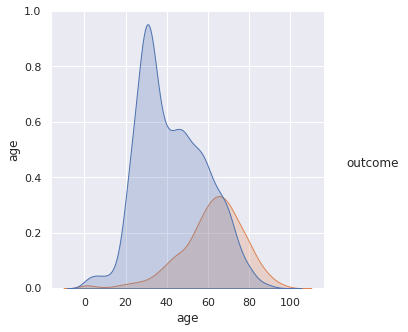

In [ ]:
#coerce the age column:
patientdata4 = patientdata2.copy()
patientdata4["age"] = pd.to_numeric(patientdata["age"], errors='coerce')

#removing missing values
patientdata4.drop(patientdata4.loc[patientdata4['age'].isna()].index, inplace=True)
patientdata4["age"] = patientdata4["age"].astype(int)
patientdata4["age"].unique()
#bin ages
patientdata4['age_bins'] = pd.cut(x=patientdata4['age'], 
                                                  bins=[0,9,19,29, 39, 49,59,69,79,89,99])
patientdata4["age_bins"].unique()
patientdata_ages = patientdata4["age_bins"]

patientdata4 = patientdata4[["age","age_bins","outcome"]].dropna()
patientdata4["outcome"] = (patientdata4["outcome"] == "dead").astype(int)
patientdata4["outcome"].value_counts()
patientdata4.head()
sns.pairplot(data=patientdata4, hue = "outcome",height=5)

#Model 1: Natural Language Processing

### NLTK Function (Text Mining)


In [ ]:
#NLTK Function
def nltk_func(target, feature, Yes, No):
    #TEXT MINING PROCESS:
    #check class distribution
    classes = target
    print(classes.value_counts()) #more recovered and less dead
    #convert class labels to binary values #1 =  dead, 0 = recovered
    encoder = LabelEncoder()
    Y = encoder.fit_transform(classes)
    #store the col_interest  
    col_interest = feature

    #PUNCTUATION
    #remove punctuation
    processed = col_interest.str.replace(r"[^\w\d\s]"," ")
    #replace whitespace between terms with a single space
    processed = processed.str.replace(r"r'\s+", " ")
    #remove leading training whitespaces
    processed = processed.str.replace(r"^\s+|\s+?$","")
    #change words to lower case
    processed = processed.str.lower()
    #remove "case"
    processed = processed.str.replace(r"case","")
    #remove "cases"
    processed = processed.str.replace(r"cases","")
    #remove "celsius"
    processed = processed.str.replace(r"celsius","")
    #replace normal numbers with "numbr"
    # processed = processed.str.replace(r"\d+(\.\d+)?","")
    processed = processed.str.replace(r"\d+(\.\d+)?","numbr")
    #remove stop words from additional info
    stop_words = set(stopwords.words("english"))
    #joining the words that make sense together (is that what thid does?)
    processed = processed.apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

    #STEMMING
    #remove word stems using a Porter stemmer e.g. ing and ed for tenses, "i have"
    ps = nltk.PorterStemmer()
    processed = processed.apply(lambda x:" ".join(ps.stem(term) for term in x.split()))

    # #LEMMATIZATION
    nltk.download('wordnet')
    word_lem = WordNetLemmatizer()
    for i in processed:
      word_lem.lemmatize(i)

    #TOKENIZATION
    #creating a bag-of-words
    all_words =[]
    for message in processed:
      words = word_tokenize(message)
      for w in words:
        all_words.append(w)
    all_words_df = DataFrame (all_words,columns=['col_of_interest'])
    #visual representation of words in model
    # plt.figure(0)
    # all_words_df['col_of_interest'].value_counts()[0:5].plot(kind='bar') #plot 5 most popular words
    # plt.figure(1)
    all_words = nltk.FreqDist(all_words)
    # all_words.plot() 

    #TEXT ANALYSIS PROCESS & MODEL TRAINING:
    #print the total number of words and the 5 most common words
    print("Number of words:{}".format(len(all_words)))
    print("Most common words: {}".format(all_words.most_common(5)))
    #use the most common words as features
    word_features = list(all_words.keys())[:]
    #define a find_features function
    def find_features(message):
      words = word_tokenize(message)
      features = {} #dictionary
      for word in word_features: #looping through the list 200 most common words
        features[word] = (word in words) 
      return features
    #find features for all messages
    messages = list(zip(processed, Y))
    #define a seed for reproducibility
    seed = 1
    np.random.seed = seed
    np.random.shuffle(messages) #shuffling text data
    #call find_features function for each SMS messages
    featuresets = [(find_features(text), label) for (text,label) in messages]
    #split training and test data sets using sklearn
    # print(featuresets)
    # print(type(featuresets))
    training, testing = model_selection.train_test_split(featuresets, test_size = 0.20, 
                                                        random_state=seed, shuffle = True)
    print("Training: {}".format(len(training)))
    print("Testing: {}".format(len(testing)))
    #Define models to train
    # names = ["K Nearest Neighbors", "Decision Tree", "Random Forest",
    #         "Logistic Regression", "SGD Classifier", "Naive Bayes", "SVN Linear"]
    # classifiers = [ KNeighborsClassifier(), DecisionTreeClassifier(),
    #               RandomForestClassifier(), LogisticRegression(),
    #               SGDClassifier(max_iter=1000),MultinomialNB(), SVC(kernel = "linear")
    #               ]
    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest",
            "Logistic Regression","Naive Bayes"]
    classifiers = [ KNeighborsClassifier(), DecisionTreeClassifier(),
                  RandomForestClassifier(), LogisticRegression(class_weight="balanced"),
                  MultinomialNB()
                  ]
    models = list(zip(names, classifiers))
    # print(models) #to see parameters each model is using
    #wrap models in nltk 
    for name, model in models:
      nltk_model = SklearnClassifier(model)
      nltk_model.train(training)
      # print(nltk.classify(nltk_model,testing))
      accuracy = nltk.classify.accuracy(nltk_model,testing)*100
      print('{}: Accuracy: {}'.format(name,accuracy))
    #build an ensemble method - Voting classifier where we combine all the algorithms
    #we have trained to make decisions
    # nltk_ensemble = SklearnClassifier(VotingClassifier(estimators=models,
    #                                                    voting ="hard", n_jobs=-1,weights =[2,1,1,2,1,1,2]))
    nltk_ensemble = SklearnClassifier(VotingClassifier(estimators=models,
                                                       voting ="soft", n_jobs=-1,weights =[2,1,1,2,1]))
    #with hard voting, binary response. With soft voting, you get a prob that it belongs to a particular class
    nltk_ensemble.train(training)
    accuracy = nltk.classify.accuracy(nltk_ensemble,testing)*100
    print()
    print('Ensemble Method Accuracy: {}'.format(accuracy)) 
    # the accuracy is much higher than for most other the individual models
    # make class label predictions for testing set
    txt_features, labels = zip(*testing)
    prediction = nltk_ensemble.classify_many(txt_features)
    #print a confusion matrix and a classification report
    print(classification_report(labels, prediction))
    print("CONFUSION MATRIX:")
    print(pd.DataFrame(confusion_matrix(labels, prediction), 
                index=[["actual", "actual"],[Yes,No]],
                columns = [["predicted", "predicted"],[Yes, No]]))
    return 

## *travel_history_location* column

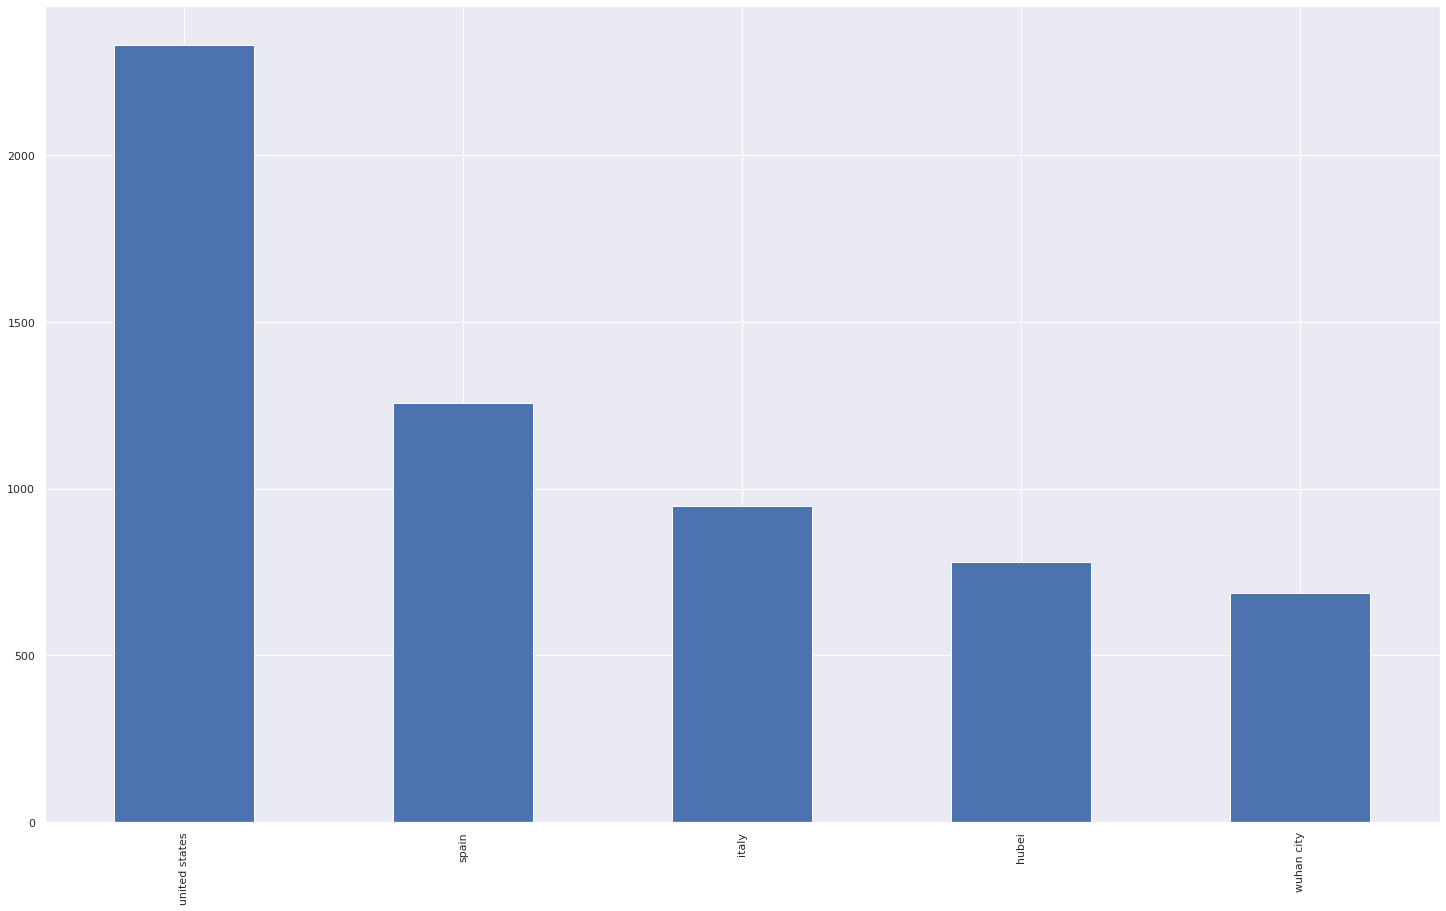

In [ ]:
### Which countries did most COVID patients visit?
#prepare data in this column for the model:
patientdata2["travel_history_location"].value_counts()
list(patientdata2["travel_history_location"].dropna())
travel_main_list =[]
travel_main_list = [x for xs in list(patientdata2["travel_history_location"].dropna()) for x in xs.split(',')]
travel_main_list = [x for xs in travel_main_list for x in xs.split(', ')]
travel_main_list = [x for xs in travel_main_list for x in xs.split(';')]
travel_main_list = [i.lstrip() for i in travel_main_list]
travel_main_list = [i.rstrip() for i in travel_main_list]
travel_main_list = [w.replace('usa', 'united states') for w in travel_main_list]


#convert to dataframe
travel = DataFrame (travel_main_list,columns=['location'])
travel
travel["location"].value_counts()[0:15]
travel['location'].value_counts()[0:5].plot(kind='bar') #plot 5 most popular locations

### Can we predict the _outcome_ of a COVID patient dependent on _travel_history_location_?


In [ ]:
#prepare dataframe for nltk process
nltk_df = patientdata2[["outcome","travel_history_location"]]
nltk_df = nltk_df.dropna()
nltk_df

nltk_func(nltk_df["outcome"],nltk_df["travel_history_location"], 
          "dead", "recovered") 

#maybe do a regression model to actually try to predict the probability of recovery

recovered    149
dead          40
Name: outcome, dtype: int64
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Number of words:73
Most common words: [('dubai', 48), ('unit', 44), ('itali', 26), ('kingdom', 24), ('state', 13)]
Training: 151
Testing: 38
K Nearest Neighbors: Accuracy: 81.57894736842105
Decision Tree: Accuracy: 78.94736842105263
Random Forest: Accuracy: 81.57894736842105
Logistic Regression: Accuracy: 78.94736842105263
Naive Bayes: Accuracy: 84.21052631578947

Ensemble Method Accuracy: 78.94736842105263
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.84      0.90      0.87        29

    accuracy                           0.79        38
   macro avg       0.71      0.67      0.68        38
weighted avg       0.78      0.79      0.78        38

CONFUSION MATRIX:
                 predicted          
                      dead recovered
a

## _symptoms_ column

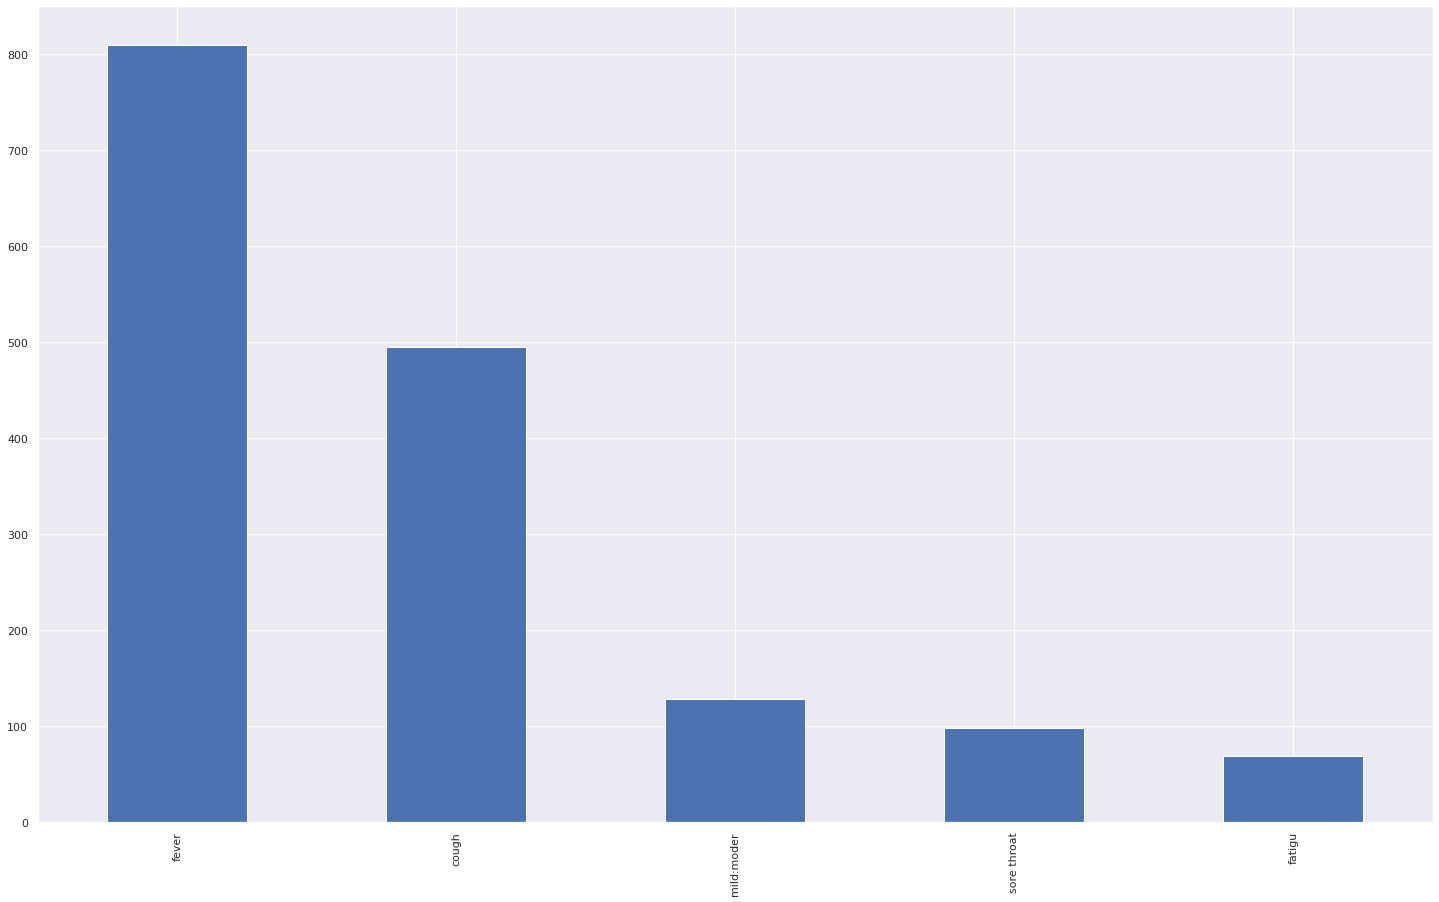

In [ ]:
### Which _symptoms_ did most COVID patients have? What was the frequency of these _symptoms_?
#prepare data in this column for the model:
patientdata2["symptoms"].value_counts()
list(patientdata2["symptoms"].dropna())
symptoms_list =[]
symptoms_list = [x for xs in symptoms_list for x in xs.split('and')]
symptoms_list = [x for xs in list(patientdata2["symptoms"].dropna()) for x in xs.split(',')]
symptoms_list = [x for xs in symptoms_list for x in xs.split(', ')]
symptoms_list = [x for xs in symptoms_list for x in xs.split(';')]
symptoms_list = [x for xs in symptoms_list for x in xs.split('; ')]
symptoms_list = [i.lstrip() for i in symptoms_list]
symptoms_list = [i.rstrip() for i in symptoms_list]
pst =  PorterStemmer()
symptoms_list = [pst.stem(i) for i in symptoms_list]
symptoms_list
symptoms_df = DataFrame (symptoms_list,columns=['symptoms'])
symptoms_df.head()

#convert to dataframe
symptoms_df["symptoms"].value_counts()[0:15]
symptoms_df['symptoms'].value_counts()[0:5].plot(kind='bar') #plot 5 most popular locations

### Can we predict the _outcome_ of a COVID patient dependent on _symptoms_?

In [ ]:
#prepare dataframe for nltk process
nltk_df = patientdata2[["outcome","symptoms"]]
nltk_df = nltk_df.dropna()
patientdata_symptom = nltk_df.copy()
nltk_df

nltk_func(nltk_df["outcome"],nltk_df["symptoms"], 
          "dead", "recovered") 

dead         141
recovered     11
Name: outcome, dtype: int64
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Number of words:78
Most common words: [('acut', 67), ('pneumonia', 66), ('respiratori', 60), ('distress', 41), ('fever', 40)]
Training: 121
Testing: 31
K Nearest Neighbors: Accuracy: 90.32258064516128
Decision Tree: Accuracy: 93.54838709677419
Random Forest: Accuracy: 93.54838709677419
Logistic Regression: Accuracy: 93.54838709677419
Naive Bayes: Accuracy: 96.7741935483871

Ensemble Method Accuracy: 96.7741935483871
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.83      0.89        31
weighted avg       0.97      0.97      0.96        31

CONFUSION MATRIX:
                 predicted          
                     

## _chronic_disease_ column

In [ ]:
#prepare dataframe for nltk process
# patientdata_chronic = patientdata2.copy()
nltk_df = patientdata2[["outcome","chronic_disease"]]
nltk_df = nltk_df.dropna()
patientdata_chronic = nltk_df.copy()
nltk_df

nltk_func(nltk_df["outcome"],nltk_df["chronic_disease"], 
          "dead", "recovered") 

dead         104
recovered     11
Name: outcome, dtype: int64
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Number of words:83
Most common words: [('hypertens', 80), ('diabet', 57), ('diseas', 35), ('chronic', 23), ('kidney', 13)]
Training: 92
Testing: 23
K Nearest Neighbors: Accuracy: 78.26086956521739
Decision Tree: Accuracy: 91.30434782608695
Random Forest: Accuracy: 91.30434782608695
Logistic Regression: Accuracy: 73.91304347826086
Naive Bayes: Accuracy: 86.95652173913044

Ensemble Method Accuracy: 91.30434782608695
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.00      0.00      0.00         2

    accuracy                           0.91        23
   macro avg       0.46      0.50      0.48        23
weighted avg       0.83      0.91      0.87        23

CONFUSION MATRIX:
                 predicted          
                      d

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## _additional_information_ column

In [ ]:
#prepare dataframe for nltk process
nltk_df = patientdata2[["outcome","additional_information"]]
nltk_df = nltk_df.dropna()
nltk_df

nltk_func(nltk_df["outcome"],nltk_df["additional_information"], 
          "dead", "recovered") 

recovered    5139
dead         1239
Name: outcome, dtype: int64
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Number of words:761
Most common words: [('cnumbr', 4362), ('numbr', 953), ('updat', 477), ('dashboard', 382), ('date', 333)]
Training: 5102
Testing: 1276
K Nearest Neighbors: Accuracy: 83.93416927899686
Decision Tree: Accuracy: 85.26645768025078
Random Forest: Accuracy: 85.26645768025078
Logistic Regression: Accuracy: 85.57993730407524
Naive Bayes: Accuracy: 84.1692789968652

Ensemble Method Accuracy: 85.34482758620689
              precision    recall  f1-score   support

           0       0.91      0.37      0.53       281
           1       0.85      0.99      0.91       995

    accuracy                           0.85      1276
   macro avg       0.88      0.68      0.72      1276
weighted avg       0.86      0.85      0.83      1276

CONFUSION MATRIX:
                 predicted          
                

# Model 2: Natural Language Processing

## NLTK Function (Analysing Dates)

## Symptoms Onset and Hospital Discharge/Death

### Predicting length of time in hospital after onset of symptoms given _additional_information_ on patient

In [ ]:
#NLTK Function
def nltk_func3(target, feature, Up_to_Day_Fourteen, Up_to_Day_Three_Hundred):
    #TEXT MINING PROCESS:
    #check class distribution
    classes = target
    print(classes.value_counts()) #more recovered and less dead
    #convert class labels to binary values #1 =  dead, 0 = recovered
    encoder = LabelEncoder()
    Y = encoder.fit_transform(classes)
    #store the col_interest  
    col_interest = feature

    #PUNCTUATION
    #remove punctuation
    processed = col_interest.str.replace(r"[^\w\d\s]"," ")
    #replace whitespace between terms with a single space
    processed = processed.str.replace(r"r'\s+", " ")
    #remove leading training whitespaces
    processed = processed.str.replace(r"^\s+|\s+?$","")
    #change words to lower case
    processed = processed.str.lower()
    #remove "case"
    processed = processed.str.replace(r"case","")
    #remove "cases"
    processed = processed.str.replace(r"cases","")
    #remove "celsius"
    processed = processed.str.replace(r"celsius","")
    #replace normal numbers with "numbr"
    # processed = processed.str.replace(r"\d+(\.\d+)?","")
    processed = processed.str.replace(r"\d+(\.\d+)?","numbr")
    processed = processed.str.replace(r"cnumbr","")
    processed = processed.str.replace(r"numbr","")
    #remove stop words from additional info
    stop_words = set(stopwords.words("english"))
    #joining the words that make sense together (is that what thid does?)
    processed = processed.apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

    #STEMMING
    #remove word stems using a Porter stemmer e.g. ing and ed for tenses, "i have"
    # ps = nltk.PorterStemmer()
    # processed = processed.apply(lambda x:" ".join(ps.stem(term) for term in x.split()))

    #LEMMATIZATION
    nltk.download('wordnet')
    word_lem = WordNetLemmatizer()
    for i in processed:
      word_lem.lemmatize(i)

    #TOKENIZATION
    #creating a bag-of-words
    all_words =[]
    for message in processed:
      words = word_tokenize(message)
      for w in words:
        all_words.append(w)
    all_words_df = DataFrame (all_words,columns=['col_of_interest'])
    #visual representation of words in model
    # plt.figure(0)
    # all_words_df['col_of_interest'].value_counts()[0:5].plot(kind='bar') #plot 5 most popular words
    # plt.figure(1)
    all_words = nltk.FreqDist(all_words)
    # all_words.plot() 

    #TEXT ANALYSIS PROCESS & MODEL TRAINING:
    #print the total number of words and the 5 most common words
    print("Number of words:{}".format(len(all_words)))
    print("Most common words: {}".format(all_words.most_common(5)))
    #use the most common words as features
    word_features = list(all_words.keys())[:]
    #define a find_features function
    def find_features(message):
      words = word_tokenize(message)
      features = {} #dictionary
      for word in word_features: #looping through the list 200 most common words
        features[word] = (word in words) 
      return features
    #find features for all messages
    messages = list(zip(processed, Y))
    #define a seed for reproducibility
    seed = 1
    np.random.seed = seed
    np.random.shuffle(messages) #shuffling text data
    #call find_features function for each SMS messages
    featuresets = [(find_features(text), label) for (text,label) in messages]
    #split training and test data sets using sklearn
    # print(featuresets)
    # print(type(featuresets))
    training, testing = model_selection.train_test_split(featuresets, test_size = 0.20, 
                                                        random_state=seed, shuffle = True)
    print("Training: {}".format(len(training)))
    print("Testing: {}".format(len(testing)))
    #Define models to train
    # names = ["K Nearest Neighbors", "Decision Tree", "Random Forest",
    #         "Logistic Regression", "SGD Classifier", "Naive Bayes", "SVN Linear"]
    # classifiers = [ KNeighborsClassifier(), DecisionTreeClassifier(),
    #               RandomForestClassifier(), LogisticRegression(),
    #               SGDClassifier(max_iter=1000),MultinomialNB(), SVC(kernel = "linear")
    #               ]
    names = ["Decision Tree", "Random Forest", "SGD Classifier","Naive Bayes","SVN Linear"]
    classifiers = [DecisionTreeClassifier(),
                  RandomForestClassifier(),
                  SGDClassifier(max_iter=1000), MultinomialNB(),SVC(kernel = "linear")
                  ]
    models = list(zip(names, classifiers))
    # print(models) #to see parameters each model is using
    #wrap models in nltk 
    for name, model in models:
      nltk_model = SklearnClassifier(model)
      nltk_model.train(training)
      # print(nltk.classify(nltk_model,testing))
      accuracy = nltk.classify.accuracy(nltk_model,testing)*100
      print('{}: Accuracy: {}'.format(name,accuracy))
    #build an ensemble method - Voting classifier where we combine all the algorithms
    #we have trained to make decisions
    nltk_ensemble = SklearnClassifier(VotingClassifier(estimators=models,
                                                       voting ="hard", n_jobs=-1))
    # nltk_ensemble = SklearnClassifier(VotingClassifier(estimators=models,
    #                                                    voting ="soft", n_jobs=-1,weights =[2,1,1,2,1]))
    #with hard voting, binary response. With soft voting, you get a prob that it belongs to a particular class
    nltk_ensemble.train(training)
    accuracy = nltk.classify.accuracy(nltk_ensemble,testing)*100
    print()
    print('Ensemble Method Accuracy: {}'.format(accuracy)) 
    # the accuracy is much higher than for most other the individual models
    # make class label predictions for testing set
    txt_features, labels = zip(*testing)
    prediction = nltk_ensemble.classify_many(txt_features)
    #print a confusion matrix and a classification report
    print(classification_report(labels, prediction))
    print("CONFUSION MATRIX:")
    print(pd.DataFrame(confusion_matrix(labels, prediction), 
                index=[["actual", "actual"],[Up_to_Day_Fourteen,Up_to_Day_Three_Hundred]],
                columns = [["predicted", "predicted"],[Up_to_Day_Fourteen, Up_to_Day_Three_Hundred]]))
    return 

(0, 14]      430
(14, 200]    201
Name: Bin_Dates, dtype: int64
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Number of words:96
Most common words: [('ph', 77), ('chronic', 25), ('diseases', 17), ('hypertension', 14), ('diabetes', 11)]
Training: 504
Testing: 127
Decision Tree: Accuracy: 69.29133858267717
Random Forest: Accuracy: 69.29133858267717
SGD Classifier: Accuracy: 69.29133858267717
Naive Bayes: Accuracy: 66.92913385826772
SVN Linear: Accuracy: 69.29133858267717

Ensemble Method Accuracy: 69.29133858267717
              precision    recall  f1-score   support

           0       0.69      0.96      0.81        85
           1       0.67      0.14      0.24        42

    accuracy                           0.69       127
   macro avg       0.68      0.55      0.52       127
weighted avg       0.69      0.69      0.62       127

CONFUSION MATRIX:
                 predicted          
                   (0, 14] (14

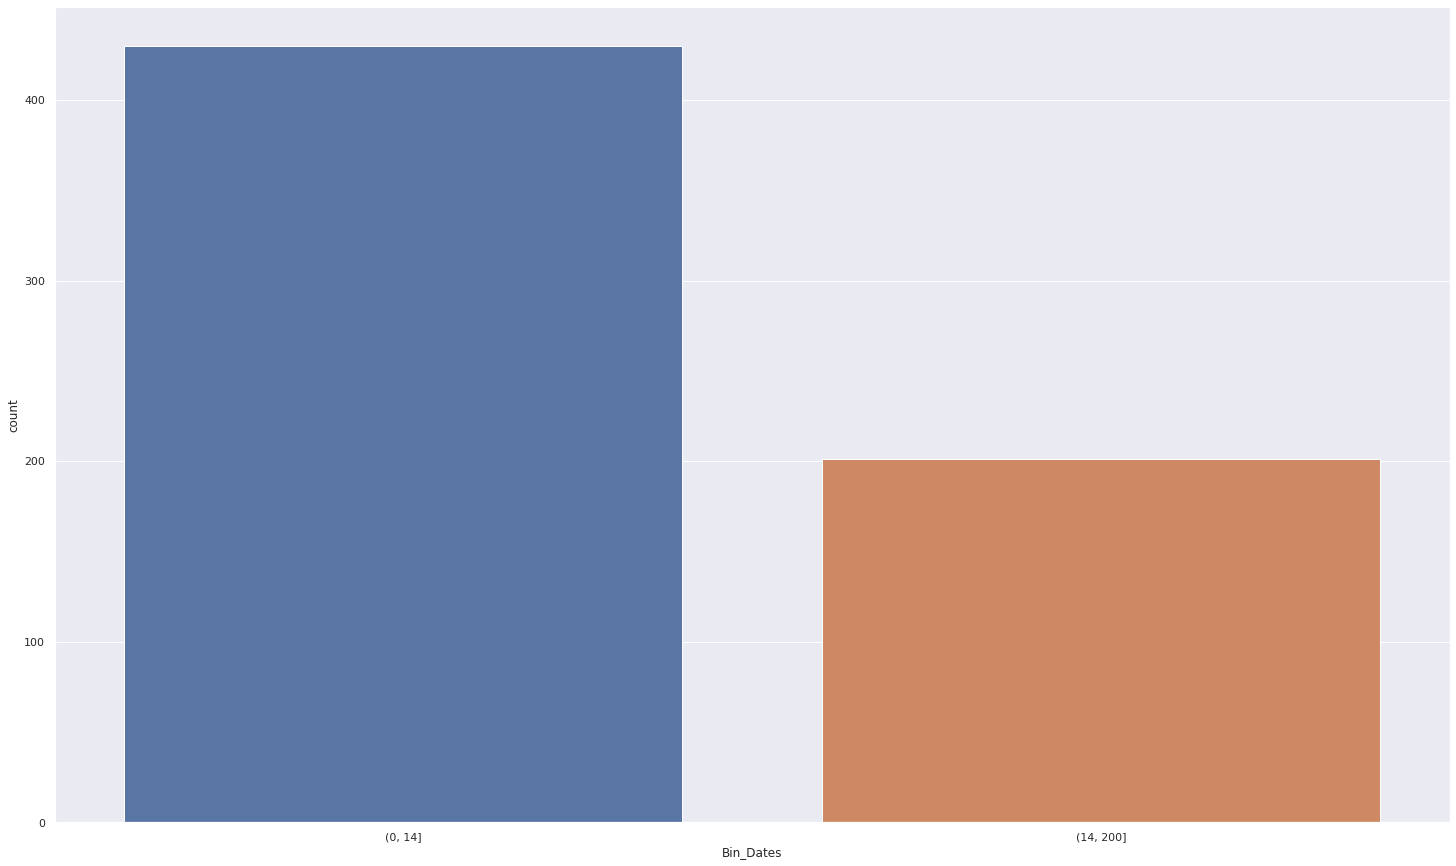

In [ ]:
patientdata_dates = patientdata2.copy()
# patientdata_dates = patientdata.copy() #changed from this to above :)
patientdata_dates = patientdata_dates[["date_onset_symptoms","date_death_or_discharge","additional_information","outcome"]]
patientdata_dates.dropna(inplace=True) #drop null rows
# patientdata_dates["outcome"].value_counts() #some of these people eventually died and some eventually recovered

# patientdata_dates = patientdata_dates.drop(62693) #this row had a range for the date of onset of symptoms
#change "." to "\"
patientdata_dates["date_onset_symptoms"] = patientdata_dates["date_onset_symptoms"].str.replace('.', '/')
patientdata_dates["date_death_or_discharge"] = patientdata_dates["date_death_or_discharge"].str.replace('.', '/')
patientdata_dates["date_onset_symptoms"] = patientdata_dates["date_onset_symptoms"].str.replace('-', '')
# patientdata_dates["date_death_or_discharge"] = patientdata_dates["date_death_or_discharge"].str.replace('-', '')
#convert to datetime
patientdata_dates['date_onset_symptoms'] =  pd.to_datetime(
    patientdata_dates['date_onset_symptoms'], format='%d/%m/%Y')
patientdata_dates['date_death_or_discharge'] =  pd.to_datetime(
    patientdata_dates['date_death_or_discharge'], format='%d/%m/%Y')
#difference between dates
patientdata_dates["Difference between dates"] = patientdata_dates["date_death_or_discharge"] - patientdata_dates["date_onset_symptoms"]
#convert days to integers
patientdata_dates['Difference between dates'] = patientdata_dates['Difference between dates'].dt.days.astype('int16')
# bin dates
# patientdata_dates['Bin_Dates'] = pd.cut(x=patientdata_dates['Difference between dates'], 
#                                                   bins=list(range(-7,63,14)))
patientdata_dates['Bin_Dates'] = pd.cut(x=patientdata_dates['Difference between dates'], 
                                                  bins=np.array([0,14, 200]))
patientdata_dates.dropna(inplace=True) #drop null rows
#sns countplot
ax = sns.countplot(x="Bin_Dates",data=patientdata_dates)
patientdata_dates

#prep...
patientdata_dates["additional_information"].unique()
patientdata_dates.Bin_Dates.value_counts()
patientdata_dates["Bin_Dates"] = patientdata_dates["Bin_Dates"].astype(str)
patientdata_dates["Bin_Dates"].unique()

#prepare dataframe for nltk process
nltk_df = patientdata_dates[["Bin_Dates","additional_information"]]
nltk_df = nltk_df.dropna()
nltk_df

patientdata_sym_disch = patientdata_dates[["Bin_Dates"]]
nltk_func3(nltk_df["Bin_Dates"],nltk_df["additional_information"], 
          '(0, 14]','(14, 200]') 

## Hospital Admission and Hospital Discharge/Death

### Predicting length of time in hospital after hospital admission given _symptoms_

(0, 14]      430
(14, 200]    201
Name: Bin_Dates, dtype: int64
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Number of words:96
Most common words: [('ph', 77), ('chronic', 25), ('diseases', 17), ('hypertension', 14), ('diabetes', 11)]
Training: 504
Testing: 127
Decision Tree: Accuracy: 75.59055118110236
Random Forest: Accuracy: 74.80314960629921
SGD Classifier: Accuracy: 75.59055118110236
Naive Bayes: Accuracy: 74.01574803149606
SVN Linear: Accuracy: 75.59055118110236

Ensemble Method Accuracy: 75.59055118110236
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        91
           1       0.69      0.25      0.37        36

    accuracy                           0.76       127
   macro avg       0.73      0.60      0.61       127
weighted avg       0.74      0.76      0.71       127

CONFUSION MATRIX:
                 predicted          
                   (0, 14] (14

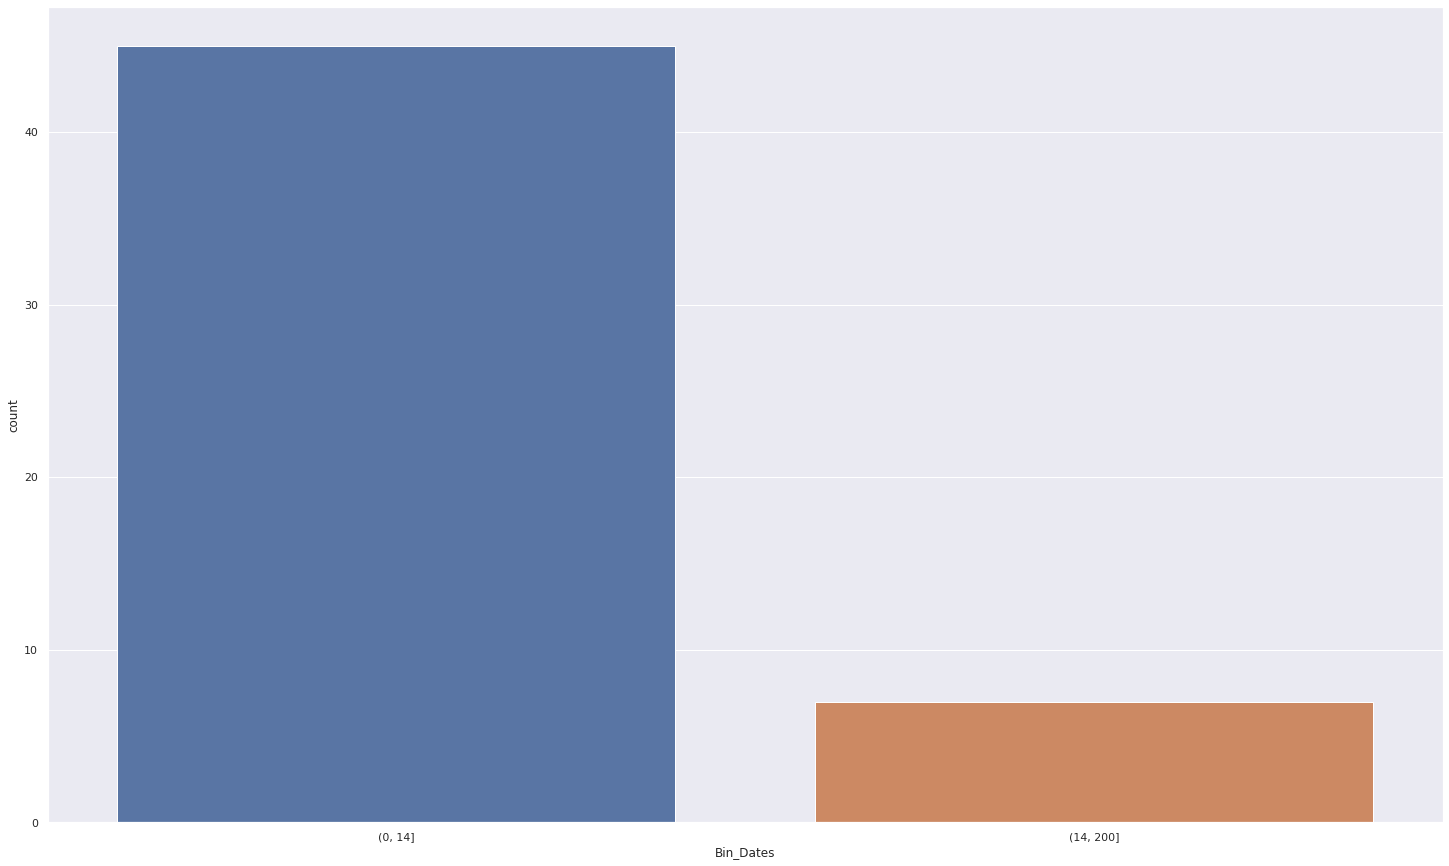

In [ ]:
patientdata_dates = patientdata2.copy()
# patientdata_dates = patientdata.copy() #changed this to above code :)
patientdata_dates = patientdata_dates[["date_admission_hospital","date_death_or_discharge","additional_information"]]
patientdata_dates.dropna(inplace=True) #drop null rows
# patientdata_dates["outcome"].value_counts() #some of these people eventually died and a larger numbr eventually recovered

#change "." to "\"
patientdata_dates["date_admission_hospital"] = patientdata_dates["date_admission_hospital"].str.replace('.', '/')
patientdata_dates["date_death_or_discharge"] = patientdata_dates["date_death_or_discharge"].str.replace('.', '/')
#convert to datetime
patientdata_dates['date_admission_hospital'] =  pd.to_datetime(
    patientdata_dates['date_admission_hospital'], format='%d/%m/%Y')
patientdata_dates['date_death_or_discharge'] =  pd.to_datetime(
    patientdata_dates['date_death_or_discharge'], format='%d/%m/%Y')
#difference between dates
patientdata_dates["Difference between dates"] = patientdata_dates["date_death_or_discharge"] - patientdata_dates["date_admission_hospital"]
#convert days to integers
patientdata_dates['Difference between dates'] = patientdata_dates['Difference between dates'].dt.days.astype('int16')
# bin dates
patientdata_dates['Bin_Dates'] = pd.cut(x=patientdata_dates['Difference between dates'], 
                                                  bins=np.array([0,14, 200]))
#sns countplot
ax = sns.countplot(x="Bin_Dates",data=patientdata_dates)
patientdata_dates.Bin_Dates.value_counts()
patientdata_hosp_disch = patientdata_dates[["Bin_Dates"]]

nltk_func3(nltk_df["Bin_Dates"],nltk_df["additional_information"], 
          '(0, 14]','(14, 200]') 

# Model 3: Logistic Regression

Why I used logistic regression (https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning#)

## NLTK Function (Simple)

In [ ]:
#NLTK Function (most common words)
def nltk_df_common_words_func(feature):
    #TEXT MINING PROCESS:
    # #check class distribution
    # classes = target
    # print(classes.value_counts()) #more recovered and less dead
    # #convert class labels to binary values #1 =  dead, 0 = recovered
    # encoder = LabelEncoder()
    # Y = encoder.fit_transform(classes)
    #store the col_interest  
    col_interest = feature

    #PUNCTUATION
    #remove punctuation
    processed = col_interest.str.replace(r"[^\w\d\s]"," ")
    #replace whitespace between terms with a single space
    processed = processed.str.replace(r"r'\s+", " ")
    #remove leading training whitespaces
    processed = processed.str.replace(r"^\s+|\s+?$","")
    #change words to lower case
    processed = processed.str.lower()
    #remove "case"
    processed = processed.str.replace(r"case","")
    #remove "cases"
    processed = processed.str.replace(r"cases","")
    #remove "celsius"
    processed = processed.str.replace(r"celsius","")
    #replace normal numbers with "numbr"
    # processed = processed.str.replace(r"\d+(\.\d+)?","")
    processed = processed.str.replace(r"\d+(\.\d+)?","numbr")
    #remove stop words from additional info
    stop_words = set(stopwords.words("english"))
    #joining the words that make sense together (is that what thid does?)
    processed = processed.apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

    #STEMMING
    #remove word stems using a Porter stemmer e.g. ing and ed for tenses, "i have"
    ps = nltk.PorterStemmer()
    processed = processed.apply(lambda x:" ".join(ps.stem(term) for term in x.split()))

    # #LEMMATIZATION
    nltk.download('wordnet')
    word_lem = WordNetLemmatizer()
    for i in processed:
      word_lem.lemmatize(i)

    #TOKENIZATION
    #creating a bag-of-words
    all_words =[]
    for message in processed:
      words = word_tokenize(message)
      for w in words:
        all_words.append(w)
    all_words_df = DataFrame (all_words,columns=['col_of_interest'])
    #visual representation of words in model
    # plt.figure(0)
    # all_words_df['col_of_interest'].value_counts()[0:5].plot(kind='bar') #plot 5 most popular words
    # plt.figure(1)
    all_words = nltk.FreqDist(all_words)
    # all_words.plot() 

    #print the total number of words and the 5 most common words
    # print("Number of words:{}".format(len(all_words)))
    # print("Most common words: {}".format(all_words.most_common(5)))

    return all_words.most_common(5)

## Integrating Previous Data For Modeling Process

In [ ]:
#y: score 
#x: age, sex, chronic disease (one-hot encode), 2 date differences, symptoms (one-hot encode)

#Create needed dataframe
patientdata5.head()
#check percent of missing values per column
print("Percentage of non-missing values per column")
for i in patientdata5.columns:
  print(i, ":",round((not patientdata5[i].isna().sum()/len(patientdata5))*100,2),"%")

#extracting most common disease for the top 5 common words (get from nltk function) (MAYBE NEGATE THIS ONE?)
patientdata_chronic.head()
nltk_df_common_words = patientdata_chronic[["chronic_disease"]]
nltk_df_common_words = nltk_df_common_words.dropna()
nltk_df_common_words
common_chronic = nltk_df_common_words_func(nltk_df_common_words["chronic_disease"]) 
print(common_chronic)

#extracting most commond symptoms for the top 5 common words 
patientdata_symptom.head()
nltk_df_common_words = patientdata_symptom[["symptoms"]]
nltk_df_common_words = nltk_df_common_words.dropna()
nltk_df_common_words
common_symptom = nltk_df_common_words_func(nltk_df_common_words["symptoms"]) 
print(common_symptom)

Percentage of non-missing values per column
ID : 100 %
age : 0 %
sex : 0 %
city : 0 %
province : 0 %
country : 0 %
date_onset_symptoms : 0 %
date_admission_hospital : 0 %
date_confirmation : 0 %
symptoms : 0 %
lives_in_Wuhan : 0 %
travel_history_dates : 0 %
travel_history_location : 0 %
reported_market_exposure : 0 %
additional_information : 0 %
chronic_disease_binary : 100 %
chronic_disease : 0 %
outcome : 100 %
date_death_or_discharge : 0 %
notes_for_discussion : 0 %
location : 0 %
country_new : 0 %
travel_history_binary : 0 %
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[('hypertens', 80), ('diabet', 57), ('diseas', 35), ('chronic', 23), ('kidney', 13)]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[('acut', 67), ('pneumonia', 66), ('respiratori', 60), ('distress', 41), ('fever', 40)]


In [ ]:
#creating column for most common disease
templist = []
for i in range(5):
  templist.append(common_chronic[i][0]) #FIND WAY TO SELECT DISEASES ONLY
templist
for i in templist:
  patientdata_chronic[i] = patientdata_chronic['chronic_disease'].str.contains(i)
patientdata_chronic.head()

#creating column for symptoms
templist1 = []
for i in range(5):
  templist1.append(common_symptom[i][0]) 
templist1
for i in templist1:
  patientdata_symptom[i] = patientdata_symptom['symptoms'].str.contains(i)
patientdata_symptom.head()

#compare score to recovered and dead info you have :)

,outcome,symptoms,acut,pneumonia,respiratori,distress,fever
8889,dead,"severe, kidney failure and hypertension",False,False,False,False,False
11111,dead,difficulty breathing,False,False,False,False,False
13331,dead,"cough, fever",False,False,False,False,True
14442,dead,"cough, sore throat",False,False,False,False,False
18330,dead,"cough, fever, malaise",False,False,False,False,True


In [ ]:
# patientdata5 = pd.merge(patientdata_chronic[templist],
#                 left_on = 'ID', right_on = 'ID')
patientdata5 = pd.merge(patientdata5,patientdata_chronic[templist],
                        how='left',left_index=True, right_index= True)
patientdata5 = pd.merge(patientdata5,patientdata_symptom[templist1], 
                        how='left',left_index=True, right_index= True)
# df_firsts_ghana = df_firsts_ghana.merge(result, left_on='date', right_on='date')

patientdata5.head()

,ID,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,outcome,date_death_or_discharge,notes_for_discussion,location,country_new,travel_history_binary,hypertens,diabet,diseas,chronic,kidney,acut,pneumonia,respiratori,distress,fever
0,000-1-1,NaN,male,shek lei,hong kong,china,NaN,NaN,14.02.2020,NaN,NaN,22.01.2020,china,NaN,case 55; mainland china travel via the lok ma ...,False,NaN,dead,NaN,NaN,shek lei,china,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000-1-10,78,male,vo euganeo,veneto,italy,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,hospitalized on 12.02.2020 for other reasons,False,NaN,dead,22.02.2020,NaN,vo' euganeo,italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,000-1-11,68,female,cremona,lombardia,italy,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,"iran; kuala lumpur, federal territory of kuala...",dead,23.02.2020,"i believe is cremona, not codogno",NaN,italy,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2223,000-1-12,88,male,NaN,NaN,san marino,NaN,25.02.2020,27.02.2020,NaN,NaN,NaN,NaN,NaN,already hospitalized in rimini on 25.02.2020,False,NaN,dead,01.03.2020,NaN,NaN,san marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3334,000-1-13,95,female,macquarie park,new south wales,australia,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,detected post mortem,False,NaN,dead,03.03.2020,NaN,macquarie park,australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
patientdata_sym_disch.rename(columns={"Bin_Dates": "Bin_Dates_sym_disch"}, inplace=True)
patientdata_hosp_disch.rename(columns={"Bin_Dates": "Bin_Dates_hosp_disch"}, inplace=True)

#merge the two dates and the ages too :)
patientdata5 = pd.merge(patientdata5,patientdata_sym_disch, 
                        how='left',left_index=True, right_index= True)
patientdata5 = pd.merge(patientdata5,patientdata_hosp_disch, 
                        how='left',left_index=True, right_index= True)
patientdata5 = pd.merge(patientdata5,patientdata_ages,
                        how="left",left_index=True, right_index= True)
patientdata5.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ID,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,outcome,date_death_or_discharge,notes_for_discussion,location,country_new,travel_history_binary,hypertens,diabet,diseas,chronic,kidney,acut,pneumonia,respiratori,distress,fever,Bin_Dates_sym_disch,Bin_Dates_hosp_disch,age_bins
0,000-1-1,NaN,male,shek lei,hong kong,china,NaN,NaN,14.02.2020,NaN,NaN,22.01.2020,china,NaN,case 55; mainland china travel via the lok ma ...,False,NaN,dead,NaN,NaN,shek lei,china,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000-1-10,78,male,vo euganeo,veneto,italy,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,hospitalized on 12.02.2020 for other reasons,False,NaN,dead,22.02.2020,NaN,vo' euganeo,italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(69.0, 79.0]"
1112,000-1-11,68,female,cremona,lombardia,italy,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,"iran; kuala lumpur, federal territory of kuala...",dead,23.02.2020,"i believe is cremona, not codogno",NaN,italy,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(59.0, 69.0]"
2223,000-1-12,88,male,NaN,NaN,san marino,NaN,25.02.2020,27.02.2020,NaN,NaN,NaN,NaN,NaN,already hospitalized in rimini on 25.02.2020,False,NaN,dead,01.03.2020,NaN,NaN,san marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0.0, 14.0]","(79.0, 89.0]"
3334,000-1-13,95,female,macquarie park,new south wales,australia,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,detected post mortem,False,NaN,dead,03.03.2020,NaN,macquarie park,australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(89.0, 99.0]"


In [ ]:
#change nan in specific columns to "remove"
# patientdata5["Bin_Dates_hosp_disch"].replace(np.nan,"remove", inplace= True,regex = True)
# patientdata5['Bin_Dates_hosp_disch'] = patientdata5['Bin_Dates_hosp_disch'].replace(np.nan, "")
# patientdata5["Bin_Dates_hosp_disch"].unique()
patientdata5.head()

# #one-hot encoding
# patientdata5_one_hot = patientdata5[["hypertens_x",	"diabet_x",
#                   "diseas_x", "chronic_x", "kidney_x","acut_x",	"pneumonia_x",
#                   "respiratori_x","distress_x","fever_x","Bin_Dates_sym_disch",
#                 	"Bin_Dates_hosp_disch","age","sex"]].copy() 
patientdata5_one_hot = patientdata5[["hypertens",	"diabet",
                  "diseas", "chronic", "kidney","acut",	"pneumonia",
                  "respiratori","distress","fever","Bin_Dates_sym_disch",
                	"Bin_Dates_hosp_disch","age_bins","sex"]].copy() 
patientdata5_one_hot = pd.get_dummies(patientdata5_one_hot, 
                                      columns=patientdata5_one_hot.columns) #one hot encoding happens here
patientdata5= patientdata5.merge(patientdata5_one_hot, left_on=patientdata5.index,
                                 right_on=patientdata5_one_hot.index) #add on the classes again  
# df5 = df5.drop(columns=['Work Rate',"key_0","Position"]) 

In [ ]:
#drop all unneeded columns
patientdata5 = patientdata5.drop(columns=["key_0","ID",'city','age',
 'province',
 'country',
 'date_onset_symptoms',
 'date_admission_hospital',
 'date_confirmation',
 'symptoms',
 'lives_in_Wuhan',
 'travel_history_dates',
 'travel_history_location',
 'reported_market_exposure',
 'additional_information',
 'chronic_disease_binary',
 'chronic_disease',
 'date_death_or_discharge',
 'notes_for_discussion',
 'location',
 'country_new',
 'travel_history_binary',
 'hypertens',
 'diabet',
 'diseas',
 'chronic',
 'kidney',
 'acut',
 'pneumonia',
 'respiratori',
 'distress',
 'fever',
 'sex',
 'age_bins',
 'Bin_Dates_sym_disch',
 'Bin_Dates_hosp_disch',])
patientdata5.head()
patientdata6 = patientdata5.copy()

## Predicting the probability that a patient will recover given information on _age, sex, chronic disease, length of hospital stay, and symptoms_

In [ ]:
#Logistic Regression :)
#rename the right foot as 1 and the left foot as 0:
patientdata5["outcome"].replace("recovered",1, inplace= True)
patientdata5["outcome"].replace("dead",0, inplace= True)

X = patientdata5.drop(columns=["outcome"])
y = patientdata5["outcome"]

#do train test split
features = patientdata5.drop("outcome", axis=1) #dropping target from features dataframe so you have only your features 
features
X_train, X_test, y_train, y_test = train_test_split(features,y, random_state=1, test_size = 0.25,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Scale separately
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#initialize the model
lm = LogisticRegression(solver='lbfgs',  
                           C=100, max_iter=1000000)

#fit model
lm.fit(X_train, y_train)

#find coef and intercept
w = lm.coef_
w0 = lm.intercept_

# print('w =', w)
print('w0 =', w0)
print("Accuracy score: ", lm.score(X_test, y_test)) 


(77493, 35) (77493,)
(25831, 35) (25831,)
w0 = [3.01694406]
Accuracy score:  0.947814641322442


Prediction of y-values:  [1 1 1 ... 1 1 1]
Confusion matrix:  [[  166  1336]
 [   12 24317]]
Classification report:                precision    recall  f1-score   support

           0       0.93      0.11      0.20      1502
           1       0.95      1.00      0.97     24329

    accuracy                           0.95     25831
   macro avg       0.94      0.56      0.59     25831
weighted avg       0.95      0.95      0.93     25831

AUC:  0.6082501613615704


Text(0.5, 954.4, 'Predicted label')

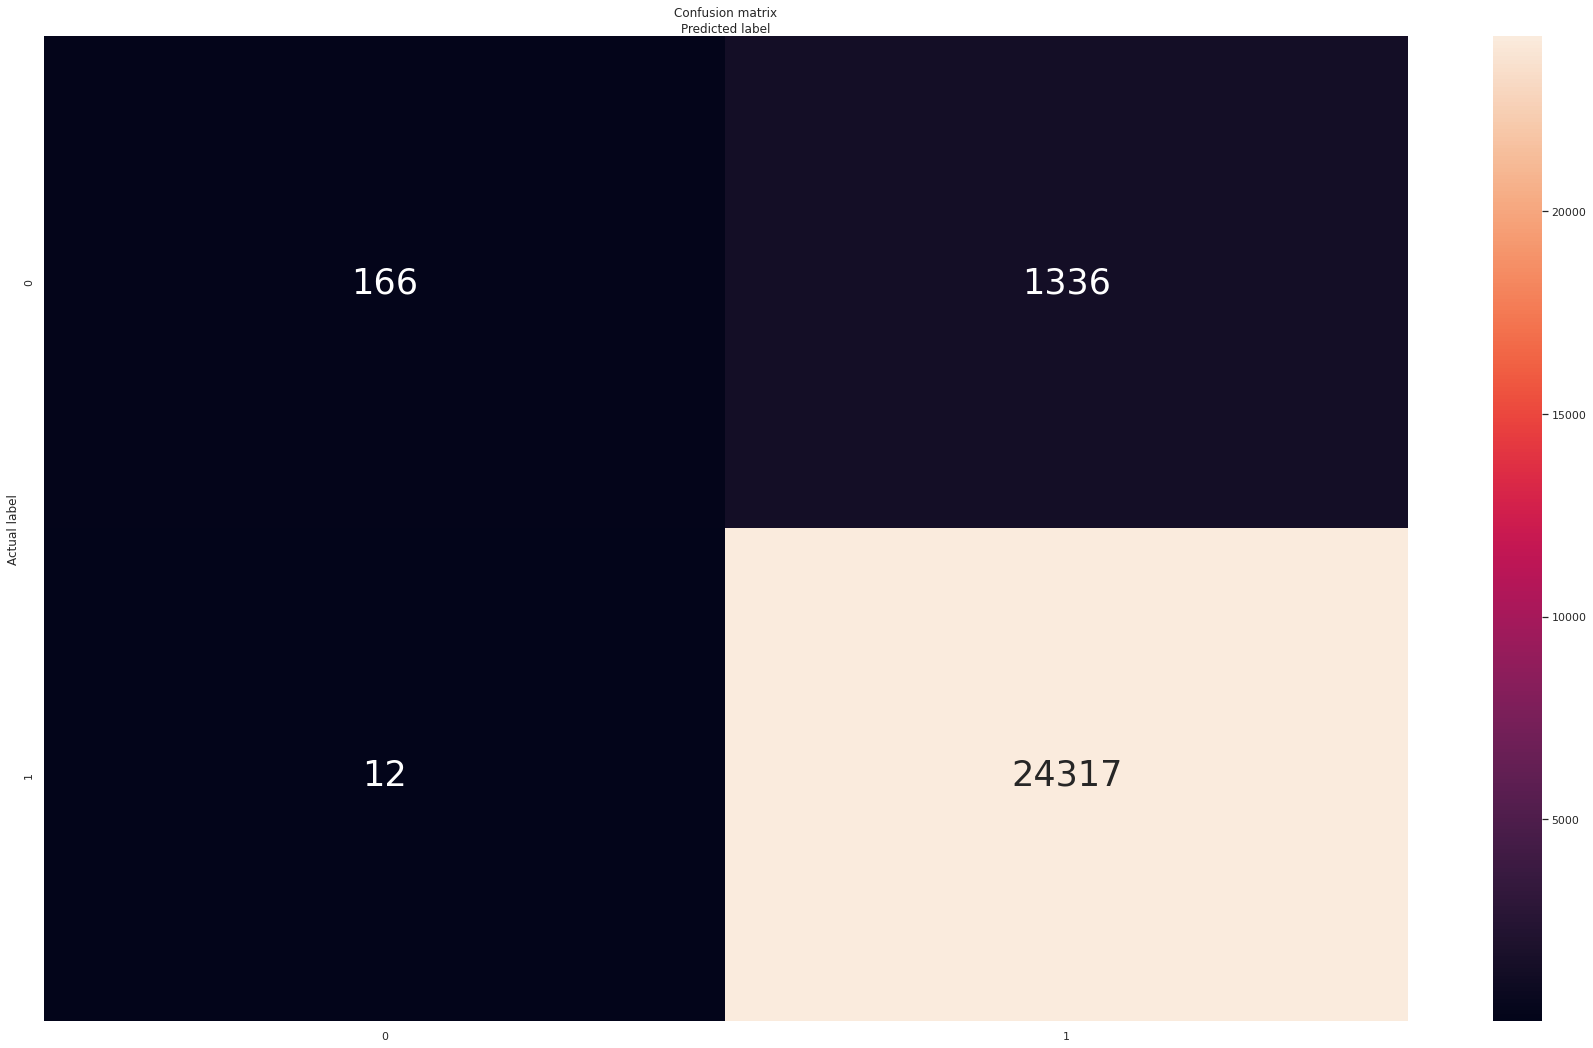

In [ ]:
#Evaluating Model:

#Predict labels:
y_predict = lm.predict(X_test)
print("Prediction of y-values: ",y_predict)
#confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion matrix: ",cnf_matrix)
#classification
print("Classification report: ",classification_report(y_test, y_predict))

pred = lm.predict_proba(X_test)[:,1] #predicting probability
pred
print("AUC: ", roc_auc_score(y_test, pred))

#Analysis (Confusion Matrix):
fig, ax = plt.subplots()
tick_marks = np.arange(len(["0","1"]))
plt.xticks(tick_marks, ["0","1"])
plt.yticks(tick_marks, ["0","1"])
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=None ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Model 4: Multinomial Logistic Regression

**Problem:** The class labels (lived/died) are too unbalanced. We have a hard time predicting whether a patient survives. 

In [ ]:
patientdata["outcome"].value_counts() 
patientdata_score = patientdata.copy()

#only extracting rows for where the patient is still hospitalized or similar:
# dropping = ["hospitalized", "symptoms only improved with cough. currently hospitalized for follow-up.",
#         "alive","stable","discharge","stable condition","discharged","discharged from hospital",
#                                  "released from quarantine",
#                                  "recovering at home 03.03.2020"]
dropping = ["hospitalized", "symptoms only improved with cough. currently hospitalized for follow-up.",
            "https://www.mspbs.gov.py/covid-19.php"]

for i in dropping:
  patientdata_score.drop(patientdata_score.loc[patientdata_score['outcome']==i].index, inplace=True)
patientdata_score["outcome"].value_counts()

#finding difference between dates of hospital admission and dates of death/discharge
#change "." to "\"
patientdata_score["date_admission_hospital"] = patientdata_score["date_admission_hospital"].str.replace('.', '/')
patientdata_score["date_death_or_discharge"] = patientdata_score["date_death_or_discharge"].str.replace('.', '/')
#convert to datetime
patientdata_score['date_admission_hospital'] =  pd.to_datetime(
    patientdata_score['date_admission_hospital'], format='%d/%m/%Y', errors="coerce")
patientdata_score['date_death_or_discharge'] =  pd.to_datetime(
    patientdata_score['date_death_or_discharge'], format='%d/%m/%Y', errors="coerce")

In [ ]:
patientdata_score["sickness_score"] = 0

# #for those who are dead, make difference of dates a 33
templist2 = ["deceased","died","death","dead","critical condition",
                                 "treated in an intensive care unit (14.02.2020)",
        "severe","critical condition, intubated as of 14.02.2020","severe illness",
        "unstable"]
for i in templist2:
  patientdata_score.loc[patientdata_score.outcome == i, 'sickness_score'] = 33

#difference between dates
patientdata_score["difference_between_dates"] = patientdata_score["date_death_or_discharge"] - patientdata_score["date_admission_hospital"]
# #convert days to integers
patientdata_score['difference_between_dates'] = patientdata_score['difference_between_dates'].dt.days.astype('int16', errors='ignore')
patientdata_score.shape
patientdata_score['difference_between_dates'].value_counts()
#drop rows with empty difference between dates
patientdata_score.dropna(subset=["difference_between_dates"],inplace=True)

#creating target
#set sickness score of 33 for those whose difference of dates is greater than 32
patientdata_score.loc[patientdata_score.difference_between_dates > 32, 'sickness_score'] = 33
#set other sickness scores with respect to the difference of dates
patientdata_score.loc[patientdata_score.difference_between_dates < 33 , 'sickness_score'] = patientdata_score.difference_between_dates

# patientdata_score["sickness_score"].value_counts()

In [ ]:
#Select features: 
# patientdata_score.dropna(subset=["date_admission_hospital","date_death_or_discharge"],inplace=True)
patientdata7 = patientdata_score.copy()
patientdata_score[["age","sex","chronic_disease_binary","sickness_score"]].dropna().shape
patientdata_score.shape
#prepare age column
patientdata_score["age"]=patientdata_score["age"].astype(int,errors="ignore")
patientdata_score["age"].unique()
#drop unusual age values
templist3 = ['80-89',"50-59","60-69","70-79",'20-29']
for i in templist3:
  df = patientdata_score[patientdata_score.age == i] 
  patientdata_score.drop(df.index,inplace=True)
print(df.index)
patientdata_score["age"].unique()
#binarize sex column
patientdata_score["sex"].replace(["male"],1, inplace= True)
patientdata_score["sex"].replace(["female"],0, inplace= True)
#binarize chronic disease column
patientdata_score["chronic_disease_binary"].replace([True],1, inplace= True)
patientdata_score["chronic_disease_binary"].replace([False],0, inplace= True)
#now extract these columns
patientdata_score = patientdata_score[["age","sex","chronic_disease_binary","sickness_score"]]

patientdata_score["age"] = patientdata_score["age"].astype(float)
patientdata_score = patientdata_score.dropna()
patientdata_score.shape
# patientdata_score["age"].unique()

Int64Index([8667, 658603], dtype='int64')


(775, 4)

,sickness_score,hypertens_False,hypertens_True,diabet_False,diabet_True,diseas_False,diseas_True,chronic_False,chronic_True,kidney_False,kidney_True,acut_False,acut_True,pneumonia_False,pneumonia_True,respiratori_False,distress_False,distress_True,fever_False,fever_True,"Bin_Dates_sym_disch_(0, 14]","Bin_Dates_sym_disch_(14, 200]","Bin_Dates_hosp_disch_(0, 14]","Bin_Dates_hosp_disch_(14, 200]","age_bins_(0, 9]","age_bins_(9, 19]","age_bins_(19, 29]","age_bins_(29, 39]","age_bins_(39, 49]","age_bins_(49, 59]","age_bins_(59, 69]","age_bins_(69, 79]","age_bins_(79, 89]","age_bins_(89, 99]",sex_female,sex_male
446,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
668,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
779,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
890,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1224,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Linear Regression Process
#creating the training and testing models:
X_train, X_test, y_train, y_test = train_test_split(patientdata_score.drop(columns=["sickness_score"]), patientdata_score[['sickness_score']]	, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#model data using Linear Regression
X = X_train
y = y_train
model = LinearRegression()
model.fit(X, y)
print("The R^2 value is ", model.score(X,y),)
print("The value of w_0 is ",model.intercept_)
# print("The coefficient of the linear regression model is ", model.coef_)

(620, 3) (620, 1)
(155, 3) (155, 1)
The R^2 value is  0.02820733211265325
The value of w_0 is  [15.39611891]


#Model 5: Logistics Regression combining components from Model 3

In [ ]:
patientdata7.head()
patientdata6.head()

#finding number of similar index values:
len(patientdata7.index.intersection(patientdata6.index)) #136

#merge dataframes by index values:
patientdata8 = pd.merge(patientdata7, patientdata6, left_index=True, right_index=True)
# patientdata8[["age","sex","chronic_disease_binary","sickness_score"]].dropna().shape
# patientdata7 = pd.merge(patientdata6,patientdata_sym_disch, 
#                         how='left',left_index=True, right_index= True)

patientdata8 = patientdata8.drop(columns=["ID",'city','age',
 'province',
 'country',
 'date_onset_symptoms',
 'date_admission_hospital',
 'date_confirmation',
 'symptoms',
 'lives_in_Wuhan',
 'travel_history_dates',
 'travel_history_location',
 'reported_market_exposure',
 'additional_information',
 'chronic_disease_binary',
 'chronic_disease',
 'date_death_or_discharge',
 'notes_for_discussion',
 'location',
 'country_new',
 'travel_history_binary',
 'sex',
 "outcome_x","difference_between_dates",
 "outcome_y"
 ])

patientdata8.head()

,sickness_score,hypertens_False,hypertens_True,diabet_False,diabet_True,diseas_False,diseas_True,chronic_False,chronic_True,kidney_False,kidney_True,acut_False,acut_True,pneumonia_False,pneumonia_True,respiratori_False,distress_False,distress_True,fever_False,fever_True,"Bin_Dates_sym_disch_(0, 14]","Bin_Dates_sym_disch_(14, 200]","Bin_Dates_hosp_disch_(0, 14]","Bin_Dates_hosp_disch_(14, 200]","age_bins_(0, 9]","age_bins_(9, 19]","age_bins_(19, 29]","age_bins_(29, 39]","age_bins_(39, 49]","age_bins_(49, 59]","age_bins_(59, 69]","age_bins_(69, 79]","age_bins_(79, 89]","age_bins_(89, 99]",sex_female,sex_male
446,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
668,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
779,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
890,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1224,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
patientdata8["sickness_score"].value_counts()
patientdata8.dropna(inplace=True)
#bin sickness scores:
patientdata8['bin_sickness_score'] = pd.cut(x=patientdata8['sickness_score'], 
                                                  bins=[0,14,33])
patientdata8['bin_sickness_score'].value_counts()
# patientdata8.head()

(0, 14]     87
(14, 33]    49
Name: bin_sickness_score, dtype: int64

In [ ]:
#Logistic Regression:
# patientdata8["outcome"].replace("recovered",1, inplace= True)
# patientdata8["outcome"].replace("dead",0, inplace= True)

X = patientdata8.drop(columns=["bin_sickness_score","sickness_score"])
y = patientdata8["bin_sickness_score"]
y=y.astype('str')

#do train test split
features = patientdata8.drop(["bin_sickness_score","sickness_score"], axis=1) #dropping target from features dataframe so you have only your features 
features
X_train, X_test, y_train, y_test = train_test_split(features,y, random_state=1, test_size = 0.2,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# #Grid search:
#source: https://www.kaggle.com/enespolat/grid-search-with-logistic-regression
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=10)
# logreg_cv.fit(X_train,y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

# Scale separately
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#initialize the model
lm = LogisticRegression(solver='lbfgs',  
                           C=100, max_iter=1000000)

#fit model
lm.fit(X_train, y_train)

#find coef and intercept
w = lm.coef_
w0 = lm.intercept_

# print('w =', w)
print('w0 =', w0)
print("Accuracy score: ", lm.score(X_test, y_test)) 


(108, 35) (108,)
(28, 35) (28,)
w0 = [-0.63441169]
Accuracy score:  0.6071428571428571


Prediction of y-values:  ['(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]'
 '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]'
 '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(14, 33]' '(0, 14]' '(0, 14]'
 '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]' '(0, 14]']
Confusion matrix:  [[17  1]
 [10  0]]
Classification report:                precision    recall  f1-score   support

     (0, 14]       0.63      0.94      0.76        18
    (14, 33]       0.00      0.00      0.00        10

    accuracy                           0.61        28
   macro avg       0.31      0.47      0.38        28
weighted avg       0.40      0.61      0.49        28



Text(0.5, 954.4, 'Predicted label')

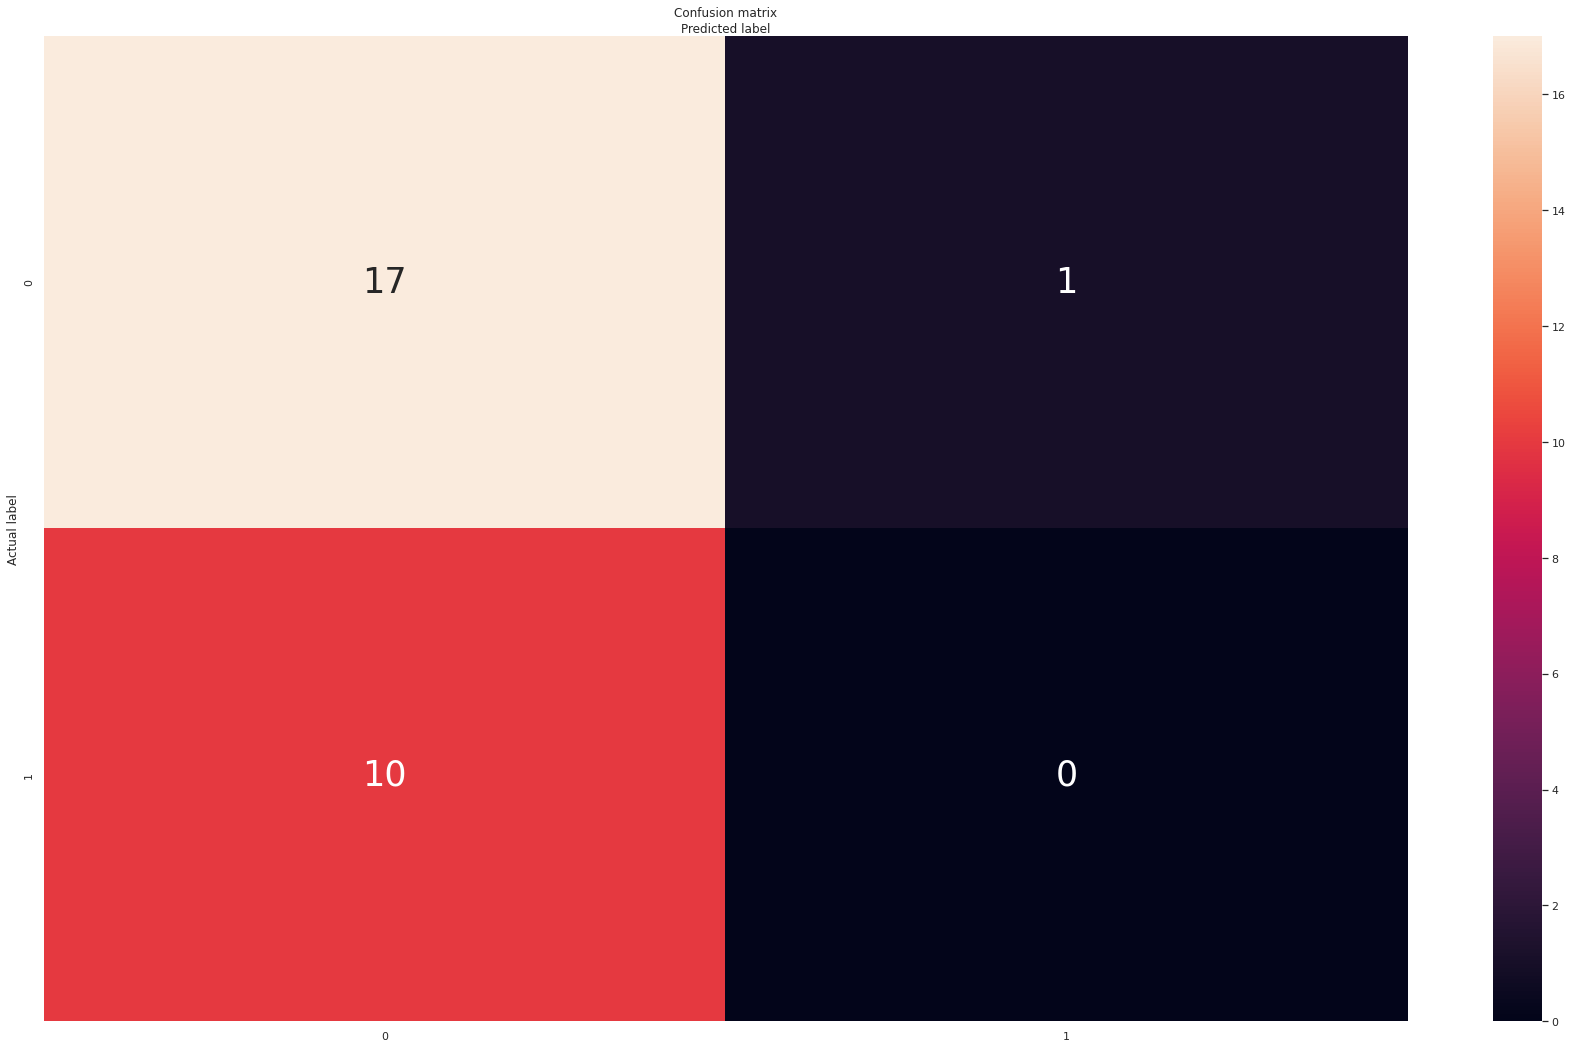

In [ ]:
#Evaluating Model:

#Predict labels:
y_predict = lm.predict(X_test)
print("Prediction of y-values: ",y_predict)
#confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion matrix: ",cnf_matrix)
#classification
print("Classification report: ",classification_report(y_test, y_predict))

pred = lm.predict_proba(X_test)[:,1] #predicting probability
pred
# print("AUC: ", roc_auc_score(y_test, pred))

#Analysis (Confusion Matrix):
fig, ax = plt.subplots()
tick_marks = np.arange(len(["0","1"]))
plt.xticks(tick_marks, ["0","1"])
plt.yticks(tick_marks, ["0","1"])
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=None ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Conclusion

- **Objectives Restated**:
 -  To examine up-to-date and unstructured text data for indicators of COVID-19  

 - To explore the possibility of predicting the outcome of future patients from current COVID-19 patient data  

 - To consider the potential for applicability in cases of triage practices for future COVID-19 patients  

 - To determine trends in specific COVID-19 patients over a stated period 

- **Big Idea Question**: In case a person comes to the hospital and has tested positive for COVID. Based on everything we know, can we make a prediction on whether we should be concerned or not very concerned about them?

- **Conclusion**: Using text and dates data, I prepared Logistic Regression and Natural Language Processing models to determine the likelihood that a patient will recover from COVID-19​. 




# References



1.   Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data (2014)
2.   https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1
3.   https://opensource.com/article/19/3/natural-language-processing-tools
4. http://www.nltk.org/ 
7. https://pypi.org/project/textacy/
8. https://pytorchnlp.readthedocs.io/en/latest/
9. https://www.activestate.com/blog/natural-language-processing-nltk-vs-spacy/ 
10. https://www.youtube.com/watch?v=5ctbvkAMQO4
11. https://www.youtube.com/watch?v=05ONoGfmKvA
12. https://computingeverywhere.soc.northwestern.edu/wp-content/uploads/2017/07/Text-Analysis-with-NLTK-Cheatsheet.pdf 
13. Olof Jacobson & Hercules Dalianis. (2016). _Applying deep learning on electronic health records in Swedish
to predict healthcare-associated infections_. Retrieved from https://www.aclweb.org/anthology/W16-2926.pdf 
14. Thomas H. McCoy et. al. (2015). _A Clinical Perspective on the Relevance of Research Domain Criteria in Electronic Health Records_. Retrieved from https://ajp.psychiatryonline.org/doi/full/10.1176/appi.ajp.2014.14091177
15. https://pasterski.com/2014/02/basic-assumptions-nlp/#:~:text=NLP%20also%20assumes%20that%20the,differently%20from%20what%20was%20intended
16. https://youtu.be/G4UVJoGFAv0
17. https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk 
